# Import Libraries and Load Dataframe

In [120]:

import pandas as pd
import numpy as np
import seaborn as sns
import sklearn.metrics as sm
from sklearn.linear_model import LinearRegression, LogisticRegression
import sklearn.model_selection as sms
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay

from sklearn.feature_selection import f_regression, mutual_info_regression

from sklearn.model_selection import TimeSeriesSplit

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import PowerTransformer

from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import GridSearchCV, HalvingGridSearchCV, RandomizedSearchCV
from sklearn.neural_network import MLPRegressor

from sklearn.svm import LinearSVR, LinearSVC
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.ensemble import IsolationForest


# calculate heuristic class weighting
from sklearn.utils.class_weight import compute_class_weight
import joblib
import statsmodels.api as sm


import tsfel
import ruptures as rpt

from statsmodels.tsa.statespace.structural import UnobservedComponents


%matplotlib inline

In [2]:
df = pd.read_csv('gas+sensor+array+under+dynamic+gas+mixtures/ethylene_methane.txt', delim_whitespace=True, skiprows=1, header=None, names=['Time','Methane','Ethylene','1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16'])

In [18]:
df.iloc[0:100,:]

Time  Methane  Ethylene      1        2      3      4      5      6  \
0    0.00      0.0       0.0 -41.98  2067.64 -37.13   2.28   8.63 -26.62   
1    0.01      0.0       0.0 -46.50  2067.88 -28.56  13.69 -12.35 -25.81   
2    0.02      0.0       0.0 -36.16  2055.81 -10.89   8.63  -2.93 -30.34   
3    0.03      0.0       0.0 -50.36  2053.68 -31.96  -0.65  -8.29 -21.60   
4    0.04      0.0       0.0 -37.30  2081.17 -36.16   3.26   5.05 -26.14   
..    ...      ...       ...    ...      ...    ...    ...    ...    ...   
96   0.96      0.0       0.0 -41.66  2065.75  -5.53  39.22  19.73  -5.21   
97   0.97      0.0       0.0 -39.72  2069.30  -2.44  35.28  23.49  -1.79   
98   0.98      0.0       0.0 -41.49  2051.31   0.16  34.62  22.84  -0.81   
99   0.99      0.0       0.0 -41.01  2068.36   3.09  34.95  19.73   1.63   
100  1.00      0.0       0.0 -41.17  2081.41   2.77  56.30  28.40   4.23   

         7      8        9       10       11       12       13       14  \
0    -8.46  -0.33  3437.73  2728.14  4054.03  4007.89  4478.27  5056.98   
1    -5.04  -5.04  3432.44  2734.47  4038.62  4019.40  4496.72  5051.81   
2    -9.27  -2.12  3438.61  2719.97  4030.92  4025.48  4489.54  5057.35   
3     7.98   2.28  3429.51  2720.50  4040.22  4000.87  4485.44  5049.60   
4    -7.48  -0.65  3436.85  2719.71  4029.64  4007.25  4499.12  5057.35   
..     ...    ...      ...      ...      ...      ...      ...      ...   
96   16.30  35.12  3448.91  2736.85  4051.14  3997.04  4476.57  5059.56   
97   22.84  29.71  3442.44  2741.87  4032.20  4004.70  4477.59  5066.58   
98   16.96  33.15  3449.79  2724.45  4035.73  4003.74  4481.00  5066.58   
99   15.16  33.15  3443.32  2739.75  4041.82  3991.94  4464.30  5068.43   
100  21.86  34.95  3435.38  2723.39  4040.22  4017.80  4494.33  5046.29   

          15       16  
0    3639.09  3128.49  
1    3636.97  3115.03  
2    3641.81  3105.24  
3    3642.72  3124.84  
4    3674.30  3147.59  
..       ...      ...  
96   3652.73  3148.15  
97   3671.56  3123.72  
98   3650.00  3157.16  
99   3656.67  3122.60  
100  3635.46  3131.01  

[101 rows x 19 columns]

In [3]:
df.head()

Time  Methane  Ethylene      1        2      3      4      5      6     7  \
0  0.00      0.0       0.0 -41.98  2067.64 -37.13   2.28   8.63 -26.62 -8.46   
1  0.01      0.0       0.0 -46.50  2067.88 -28.56  13.69 -12.35 -25.81 -5.04   
2  0.02      0.0       0.0 -36.16  2055.81 -10.89   8.63  -2.93 -30.34 -9.27   
3  0.03      0.0       0.0 -50.36  2053.68 -31.96  -0.65  -8.29 -21.60  7.98   
4  0.04      0.0       0.0 -37.30  2081.17 -36.16   3.26   5.05 -26.14 -7.48   

      8        9       10       11       12       13       14       15  \
0 -0.33  3437.73  2728.14  4054.03  4007.89  4478.27  5056.98  3639.09   
1 -5.04  3432.44  2734.47  4038.62  4019.40  4496.72  5051.81  3636.97   
2 -2.12  3438.61  2719.97  4030.92  4025.48  4489.54  5057.35  3641.81   
3  2.28  3429.51  2720.50  4040.22  4000.87  4485.44  5049.60  3642.72   
4 -0.65  3436.85  2719.71  4029.64  4007.25  4499.12  5057.35  3674.30   

        16  
0  3128.49  
1  3115.03  
2  3105.24  
3  3124.84  
4  3147.59

In [4]:
df.describe()

Time       Methane      Ethylene             1             2  \
count  4.178504e+06  4.178504e+06  4.178504e+06  4.178504e+06  4.178504e+06   
mean   2.089566e+04  5.808503e+01  4.369478e+00  2.520157e+03  1.711449e+03   
std    1.206404e+04  7.663941e+01  5.521296e+00  2.532045e+02  1.184762e+02   
min    0.000000e+00  0.000000e+00  0.000000e+00 -5.648000e+01  1.568880e+03   
25%    1.044672e+04  0.000000e+00  0.000000e+00  2.335120e+03  1.639010e+03   
50%    2.089672e+04  0.000000e+00  0.000000e+00  2.463490e+03  1.701300e+03   
75%    3.134324e+04  1.000000e+02  8.330000e+00  2.676930e+03  1.754580e+03   
max    4.179019e+04  2.966700e+02  2.000000e+01  3.402560e+03  9.825750e+03   

                  3             4             5             6             7  \
count  4.178504e+06  4.178504e+06  4.178504e+06  4.178504e+06  4.178504e+06   
mean   2.756596e+03  3.035848e+03  1.863258e+03  2.386329e+03  2.689914e+03   
std    1.150495e+03  1.252085e+03  1.104965e+03  1.425092e+03  1.102780e+03   
min   -4.778000e+01 -6.830000e+00 -1.268000e+01 -4.198000e+01 -1.528000e+01   
25%    1.581310e+03  1.750760e+03  8.197600e+02  1.061500e+03  1.533260e+03   
50%    2.885640e+03  3.199850e+03  1.393180e+03  1.688830e+03  2.785620e+03   
75%    3.798990e+03  4.172030e+03  2.813350e+03  3.605260e+03  3.610690e+03   
max    5.567440e+03  6.127680e+03  4.420840e+03  5.707530e+03  5.304140e+03   

                  8             9            10            11            12  \
count  4.178504e+06  4.178504e+06  4.178504e+06  4.178504e+06  4.178504e+06   
mean   2.978962e+03  3.541804e+03  2.823842e+03  2.301598e+03  2.024606e+03   
std    1.229724e+03  2.607058e+02  2.002925e+02  9.875315e+02  8.246309e+02   
min   -1.187000e+01  2.976530e+03  2.367650e+03  6.898700e+02  5.817900e+02   
25%    1.660440e+03  3.344630e+03  2.672740e+03  1.409680e+03  1.201660e+03   
50%    3.136350e+03  3.481370e+03  2.782960e+03  2.174530e+03  2.072150e+03   
75%    4.083020e+03  3.708470e+03  2.943730e+03  3.140840e+03  2.701560e+03   
max    5.820370e+03  4.436430e+03  3.519340e+03  4.849910e+03  4.062070e+03   

                 13            14            15            16  
count  4.178504e+06  4.178504e+06  4.178504e+06  4.178504e+06  
mean   1.687490e+03  1.806279e+03  2.309401e+03  1.862996e+03  
std    9.865598e+02  1.102382e+03  9.652522e+02  7.658043e+02  
min    4.433000e+02  4.239800e+02  7.713900e+02  5.890900e+02  
25%    7.593200e+02  7.685600e+02  1.424110e+03  1.113520e+03  
50%    1.266570e+03  1.332660e+03  2.165370e+03  1.839750e+03  
75%    2.543380e+03  2.746090e+03  3.123440e+03  2.506360e+03  
max    4.540980e+03  5.108820e+03  4.699970e+03  3.764370e+03

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4178504 entries, 0 to 4178503
Data columns (total 19 columns):
 #   Column    Dtype  
---  ------    -----  
 0   Time      float64
 1   Methane   float64
 2   Ethylene  float64
 3   1         float64
 4   2         float64
 5   3         float64
 6   4         float64
 7   5         float64
 8   6         float64
 9   7         float64
 10  8         float64
 11  9         float64
 12  10        float64
 13  11        float64
 14  12        float64
 15  13        float64
 16  14        float64
 17  15        float64
 18  16        float64
dtypes: float64(19)
memory usage: 605.7 MB


# Split Data into Train, Test, and Deployment Sets

In [3]:
Methane_bin = []
Ethylene_bin = []

for i in df['Methane']:
    if i > 0.0: 
        Methane_bin.append(int(1))
    else:
        Methane_bin.append(int(0))
for i in df['Ethylene']:
    if i > 0.0: 
        Ethylene_bin.append(int(1))
    else:
        Ethylene_bin.append(int(0))

df['Methane Bin'] = Methane_bin
df['Ethylene Bin'] = Ethylene_bin

In [4]:
x1 = df[['Time','1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16']]
y = df[['Methane', 'Ethylene', 'Methane Bin', "Ethylene Bin"]]


# Split data sets evenly into training, test, and deployment (40%, 30%, 30%)
x1_train, x1_deployment_test, y_train, y_deployment_test = train_test_split(x1, y, test_size=0.6, random_state=42, shuffle = False)
x1_test, x1_deployment, y_test, y_deployment = train_test_split(x1_deployment_test, y_deployment_test, test_size = 0.5, shuffle =  False)

In [4]:
x1_deployment.info(), x1_train.info(), x1_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1253552 entries, 2924952 to 4178503
Data columns (total 17 columns):
 #   Column  Non-Null Count    Dtype  
---  ------  --------------    -----  
 0   Time    1253552 non-null  float64
 1   1       1253552 non-null  float64
 2   2       1253552 non-null  float64
 3   3       1253552 non-null  float64
 4   4       1253552 non-null  float64
 5   5       1253552 non-null  float64
 6   6       1253552 non-null  float64
 7   7       1253552 non-null  float64
 8   8       1253552 non-null  float64
 9   9       1253552 non-null  float64
 10  10      1253552 non-null  float64
 11  11      1253552 non-null  float64
 12  12      1253552 non-null  float64
 13  13      1253552 non-null  float64
 14  14      1253552 non-null  float64
 15  15      1253552 non-null  float64
 16  16      1253552 non-null  float64
dtypes: float64(17)
memory usage: 172.1 MB
<class 'pandas.core.frame.DataFrame'>
Index: 1671401 entries, 0 to 1671400
Data columns (total 17 colu

(None, None, None)

In [5]:
x1_deployment

Time        1        2        3        4        5        6  \
2924952  29253.99  2402.60  1667.96  2169.71  2474.11  2469.30  3247.09   
2924953  29254.00  2424.42  1655.57  2166.34  2472.34  2472.34  3256.24   
2924954  29254.01  2422.91  1663.09  2174.29  2459.95  2462.22  3280.02   
2924955  29254.02  2417.14  1658.22  2167.06  2466.52  2481.46  3245.66   
2924956  29254.03  2416.89  1659.77  2155.26  2468.80  2470.32  3254.81   
...           ...      ...      ...      ...      ...      ...      ...   
4178499  41790.15  2348.01  1599.24  1329.94  1488.62  1031.11  1431.76   
4178500  41790.16  2341.81  1605.37  1333.28  1479.61  1022.80  1421.56   
4178501  41790.17  2345.78  1604.06  1337.47  1475.10  1022.61  1423.68   
4178502  41790.18  2350.25  1594.86  1323.68  1492.49  1041.03  1434.53   
4178503  41790.19  2348.01  1598.80  1338.93  1490.34  1033.49  1405.23   

               7        8        9       10       11       12       13  \
2924952  2283.58  2698.94  3350.14  2687.14  1358.22  1544.97  2275.48   
2924953  2291.69  2707.87  3349.27  2685.57  1346.47  1539.33  2276.71   
2924954  2291.20  2708.92  3351.30  2681.64  1341.65  1537.38  2276.71   
2924955  2280.14  2704.71  3358.55  2688.97  1345.00  1535.86  2249.05   
2924956  2282.10  2704.45  3359.72  2698.68  1360.95  1529.15  2242.21   
...          ...      ...      ...      ...      ...      ...      ...   
4178499  1335.58  1506.05  3300.43  2634.70  1156.91   975.15   972.41   
4178500  1336.00  1500.45  3277.72  2640.67  1155.49   975.15   963.60   
4178501  1345.63  1504.76  3299.56  2622.24  1153.47   964.18   978.68   
4178502  1338.72  1508.85  3296.69  2640.15  1150.03   971.04   976.92   
4178503  1337.68  1518.34  3292.95  2633.40  1152.05   977.51   984.96   

              14       15       16  
2924952  2389.34  1577.16  1397.20  
2924953  2410.37  1562.35  1409.05  
2924954  2394.84  1557.78  1404.60  
2924955  2412.12  1584.80  1420.92  
2924956  2411.62  1568.66  1424.11  
...          ...      ...      ...  
4178499   929.27  1211.47   948.94  
4178500   938.42  1222.74   937.25  
4178501   949.92  1204.32   921.50  
4178502   940.76  1212.09   946.99  
4178503   934.14  1201.46   932.38  

[1253552 rows x 17 columns]

In [6]:
# Combine the dataframes
train_df = pd.concat([x1_train, y_train], axis = 1)
test_df = pd.concat([x1_test, y_test], axis = 1)

# Perform Initial Round of EDA 
(Need to verify each sensor is working)

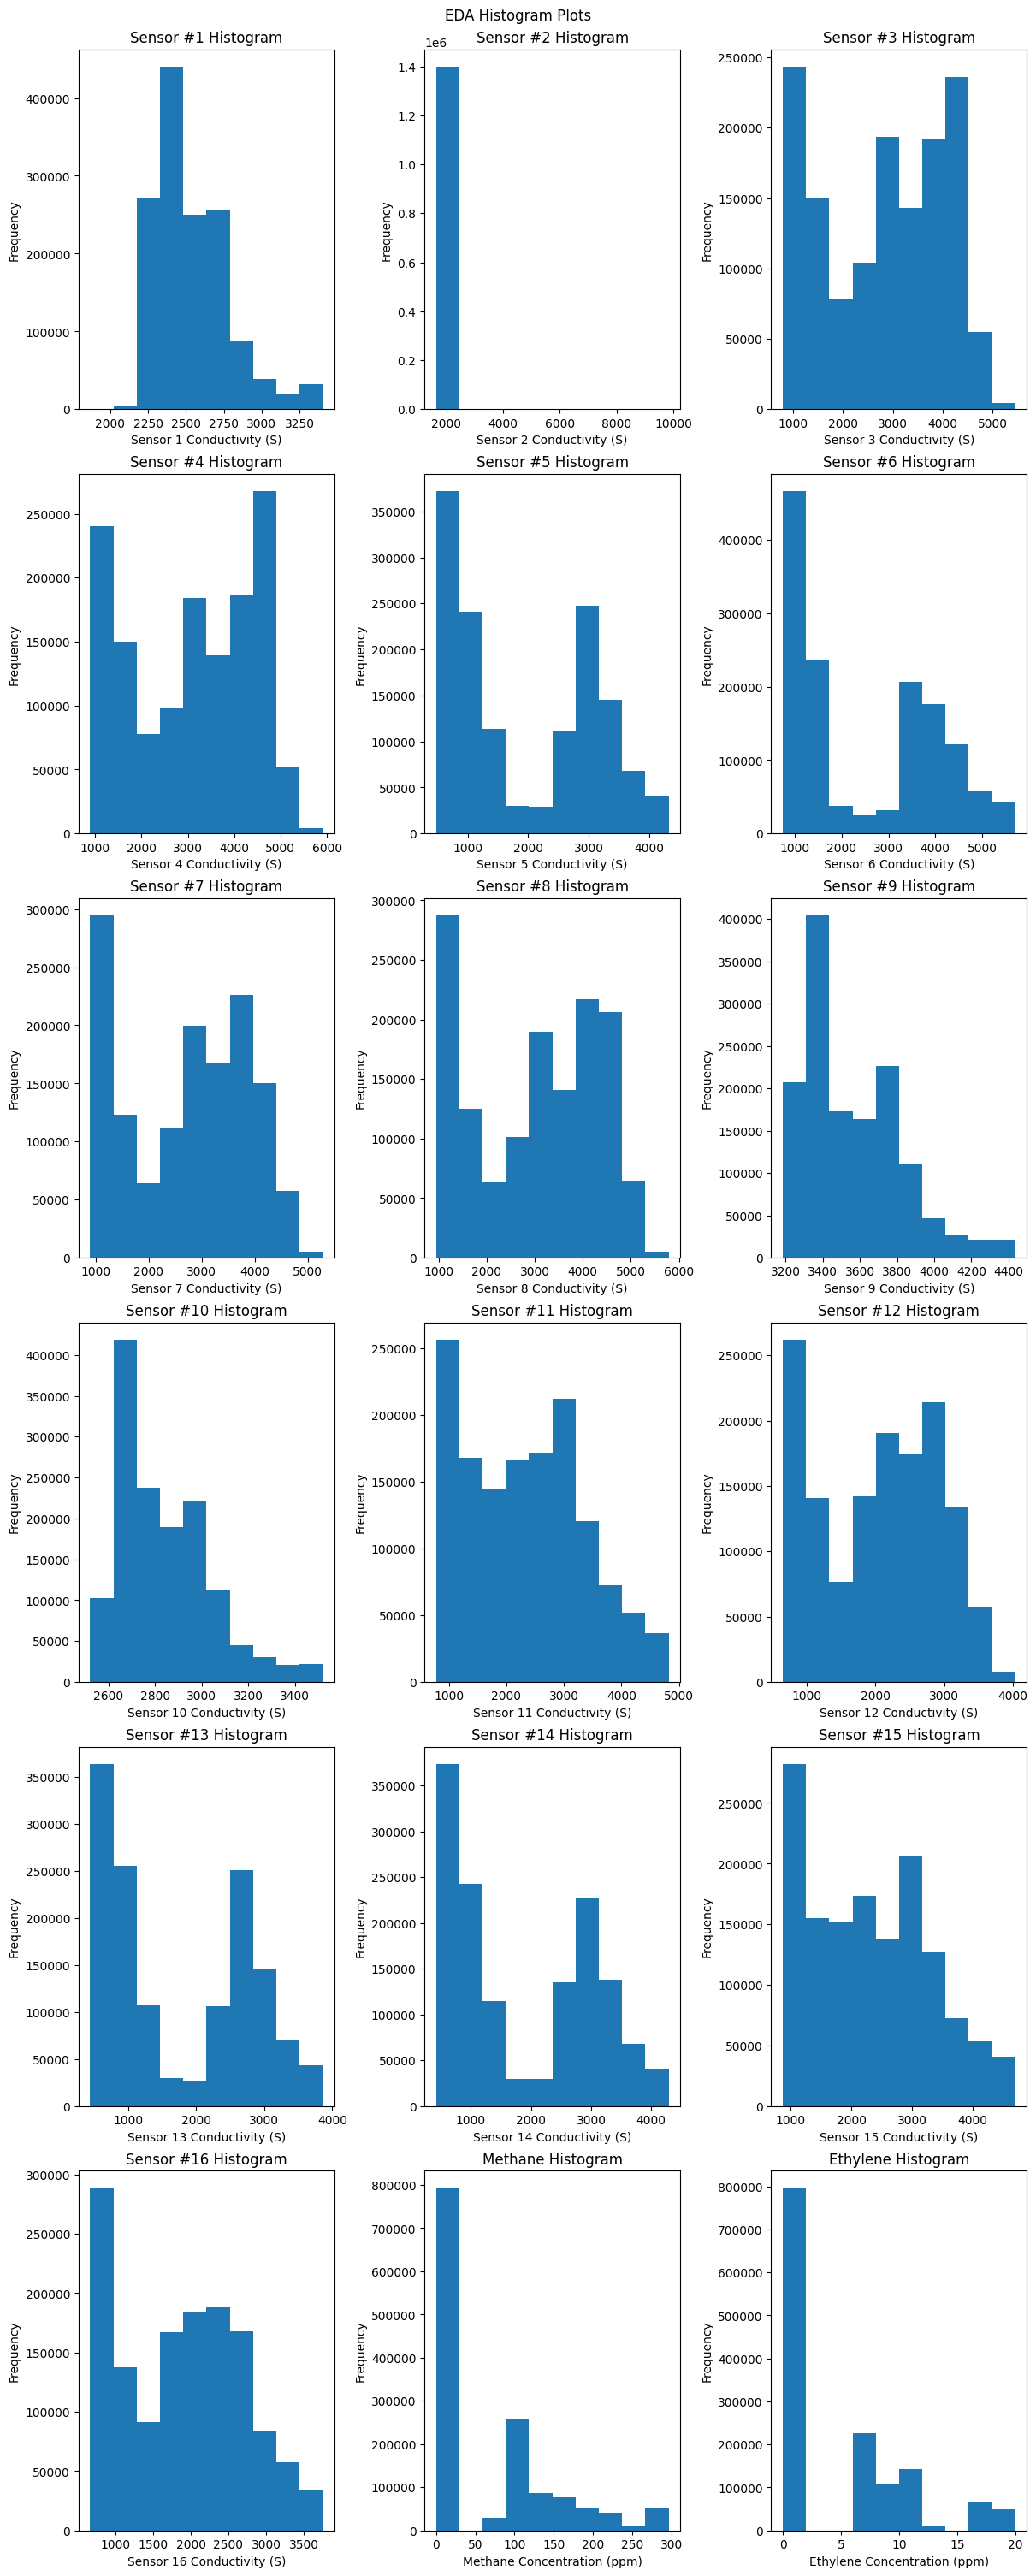

In [12]:
# Plot standard plots (all histograms + a time scatter plot)
fig = plt.figure(figsize = (12, 30), layout = "constrained")
fig.suptitle("EDA Histogram Plots")
for i in range(1, 19):
    ax1 = fig.add_subplot(18//3, 3, i)
    ax1.hist(train_df.iloc[:,i])
    x_label_string = train_df.iloc[:,i].name
    if i < 17:
        x_label_string = "Sensor " + x_label_string + " Conductivity (S)"
    else: 
        x_label_string = x_label_string + " Concentration (ppm)"
    ax1.set_xlabel(x_label_string)
    ax1.set_ylabel("Frequency")
    if i < 17:
        ax1.title.set_text("Sensor #" + train_df.iloc[:,i].name + " Histogram")
    else:
        ax1.title.set_text(train_df.iloc[:,i].name + " Histogram") 
plt.show()

In [141]:
import matplotlib
color_list = ["pink", "red", "maroon", "salmon", "orange", "yellow", "yellowgreen", "green", "cyan", "blue", "indigo", "violet", "gray", "black", "brown", "chocolate"]
colors = [matplotlib.colors.cnames[color] for color in color_list]

In [ ]:
# Plot standard plots (all histograms + a time scatter plot) over all datapoints
fig_conduct = plt.figure(figsize = (12, 10), layout = "constrained")
ax_scatter_conduct = fig_conduct.add_subplot(2, 1, 1)
ax_scatter_concentration = fig_conduct.add_subplot(2, 1, 2)
# Cycler for conductivity plots

for i in range(1, 19):
    x_label_string = df.iloc[:,i].name
    if i > 2:
        ax_scatter_conduct.plot(df.iloc[:,0], df.iloc[:,i], label = x_label_string, color = colors[i - 3])
        ax_scatter_conduct.legend()
        ax_scatter_conduct.set_xlabel("Time (s)")
        ax_scatter_conduct.set_ylabel("Conductivity (S)")
        ax_scatter_conduct.title.set_text("Time Plot of Sensors Of All Datapoints") 
        ax_scatter_conduct.legend() 
    else:  
        ax_scatter_concentration.plot(df.iloc[:,0], df.iloc[:,i], label = x_label_string)
        ax_scatter_concentration.legend()
        ax_scatter_concentration.set_xlabel("Time (s)")
        ax_scatter_concentration.set_ylabel("Concentration (ppm)")
        ax_scatter_concentration.title.set_text("Time Plot of Concentrations Of All Datapoints")
        ax_scatter_concentration.legend()   
plt.show()

C:\Users\jacob\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


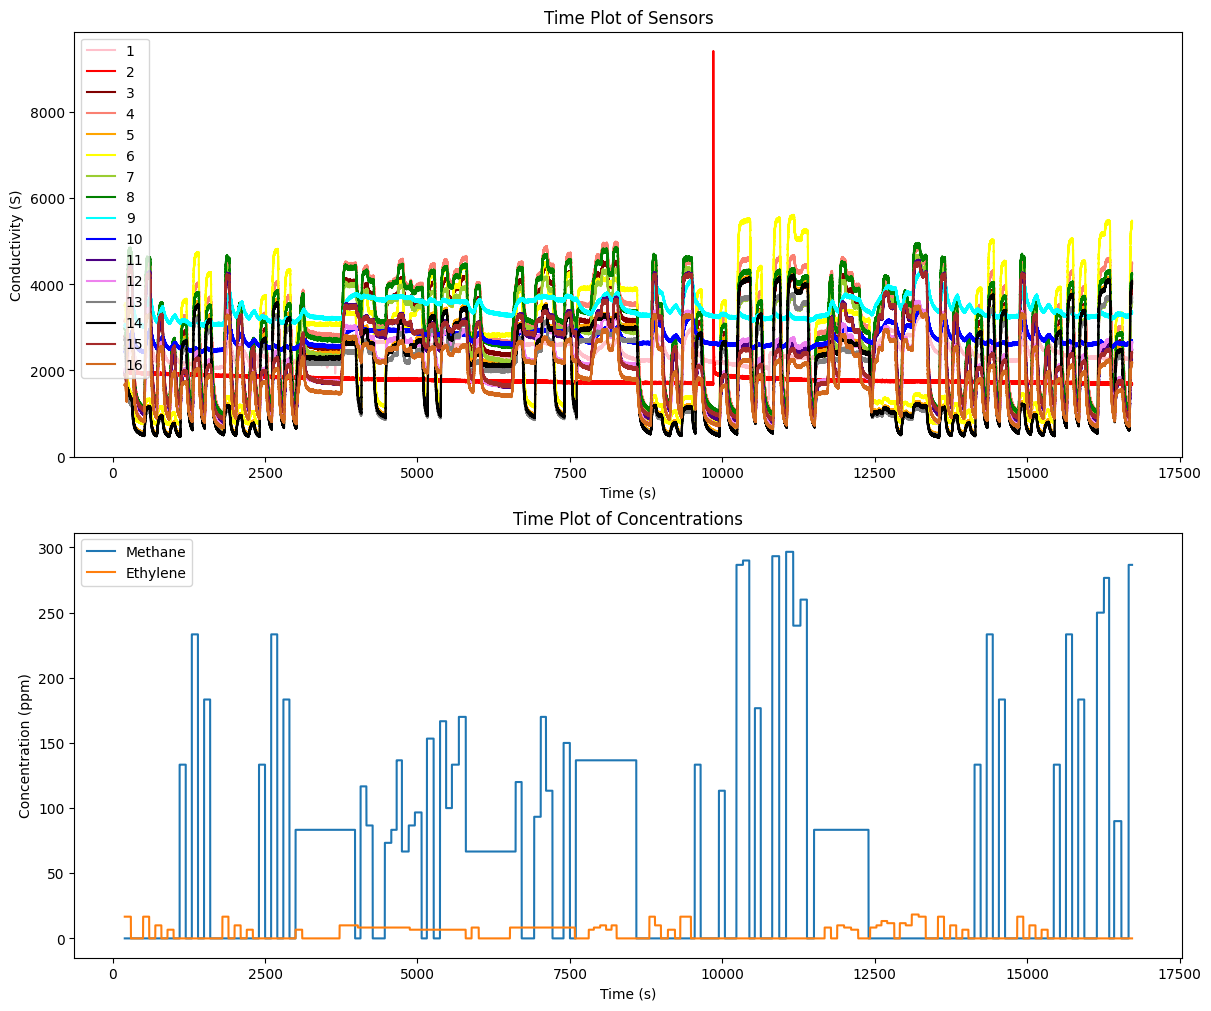

In [142]:
# Plot standard plots (all histograms + a time scatter plot)
fig_conduct = plt.figure(figsize = (12, 10), layout = "constrained")
ax_scatter_conduct = fig_conduct.add_subplot(2, 1, 1)
ax_scatter_concentration = fig_conduct.add_subplot(2, 1, 2)
# Cycler for conductivity plots

for i in range(1, 19):
    x_label_string = train_df.iloc[:,i].name
    if i < 17:
        ax_scatter_conduct.plot(train_df.iloc[:,0], train_df.iloc[:,i], label = x_label_string, color = colors[i - 1])
        ax_scatter_conduct.legend()
        ax_scatter_conduct.set_xlabel("Time (s)")
        ax_scatter_conduct.set_ylabel("Conductivity (S)")
        ax_scatter_conduct.title.set_text("Time Plot of Sensors") 
        ax_scatter_conduct.legend() 
    else:  
        ax_scatter_concentration.plot(train_df.iloc[:,0], train_df.iloc[:,i], label = x_label_string)
        ax_scatter_concentration.legend()
        ax_scatter_concentration.set_xlabel("Time (s)")
        ax_scatter_concentration.set_ylabel("Concentration (ppm)")
        ax_scatter_concentration.title.set_text("Time Plot of Concentrations")
        ax_scatter_concentration.legend()   
plt.show()

Let's check each sensor of each type

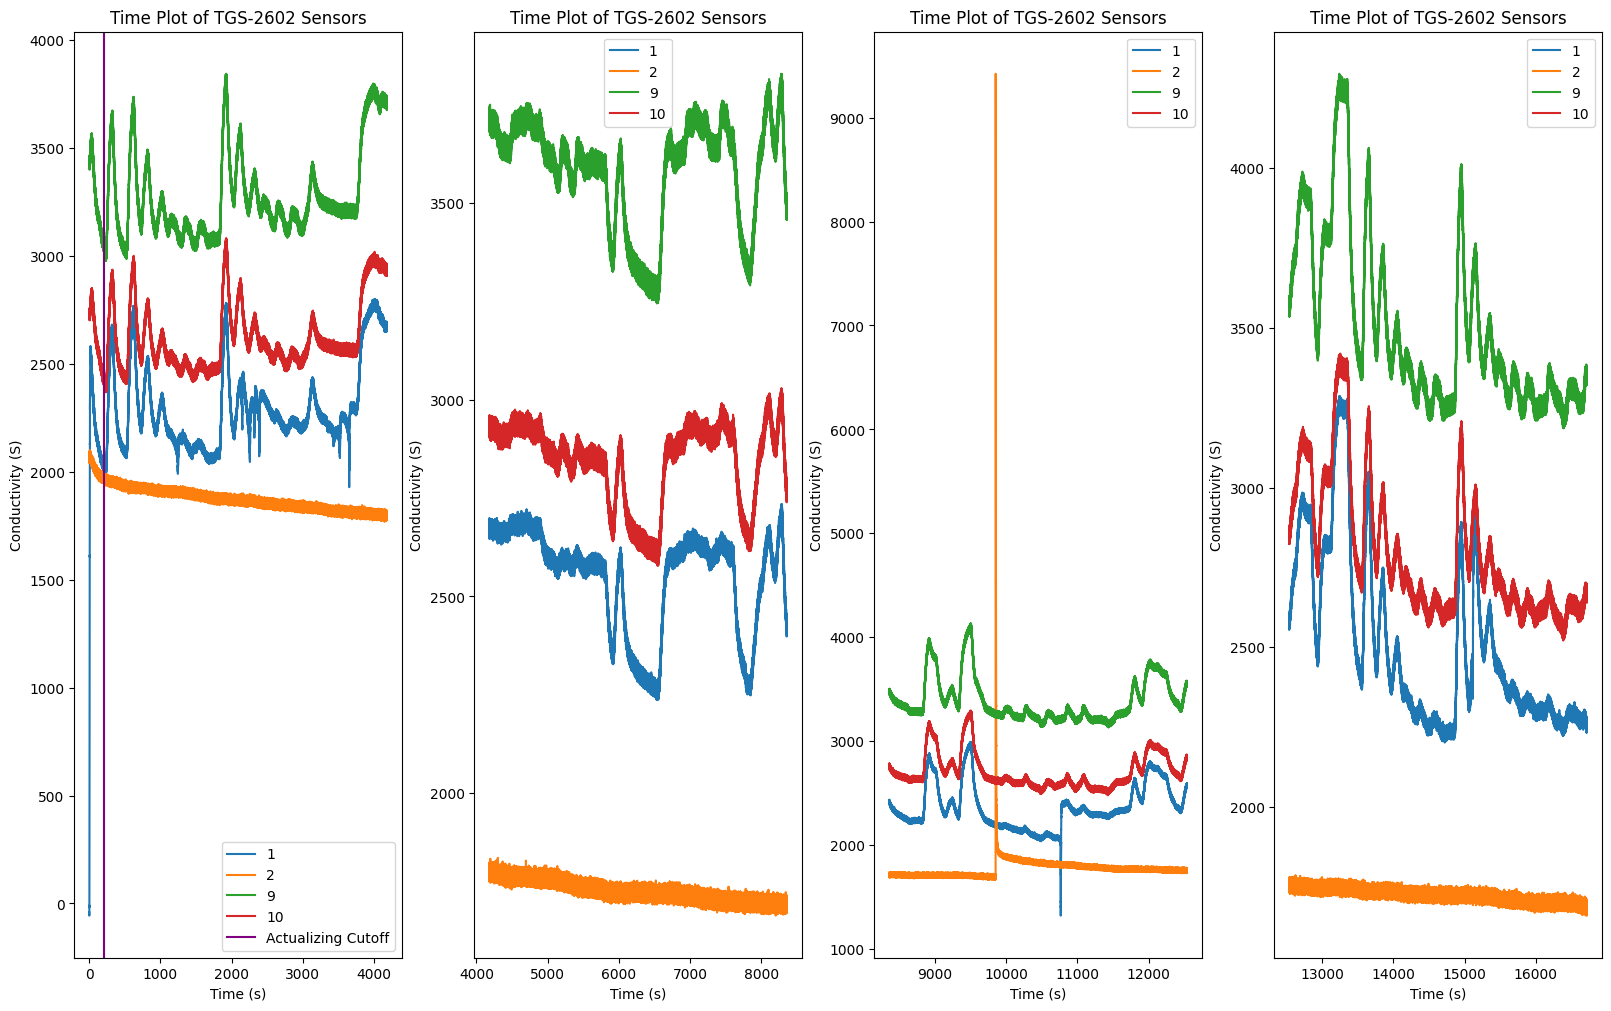

In [11]:
# Plot TG-2602 Sensors Over Time
sensors = [1, 2, 9, 10]
fig_conduct = plt.figure(figsize = (16, 10), layout = "constrained")
# ax_scatter_conduct = fig_conduct.add_subplot(2, 1, 1)
# Cycler for conductivity plots
num_ranges = 4

ax_scatter_conduct_list = [fig_conduct.add_subplot(1, 4, j + 1) for j in range(num_ranges)]
for i in sensors:
    x_label_string = train_df.iloc[:,i].name
    for j in range(num_ranges):
        ax_scatter_conduct = ax_scatter_conduct_list[j]
        ax_scatter_conduct.plot(train_df.iloc[j * train_df.shape[0] // 4: (j + 1) * train_df.shape[0] // 4,0], train_df.iloc[j * train_df.shape[0] // 4: (j + 1) * train_df.shape[0] // 4,i], label = x_label_string)
        ax_scatter_conduct.legend()
        ax_scatter_conduct.set_xlabel("Time (s)")
        ax_scatter_conduct.set_ylabel("Conductivity (S)")
        ax_scatter_conduct.title.set_text("Time Plot of TGS-2602 Sensors") 
        if j > 0:
            ax_scatter_conduct.legend() 
ax_scatter_conduct_list[0].axvline(200, c = "purple", label = "Actualizing Cutoff")
ax_scatter_conduct_list[0].legend()
plt.show()

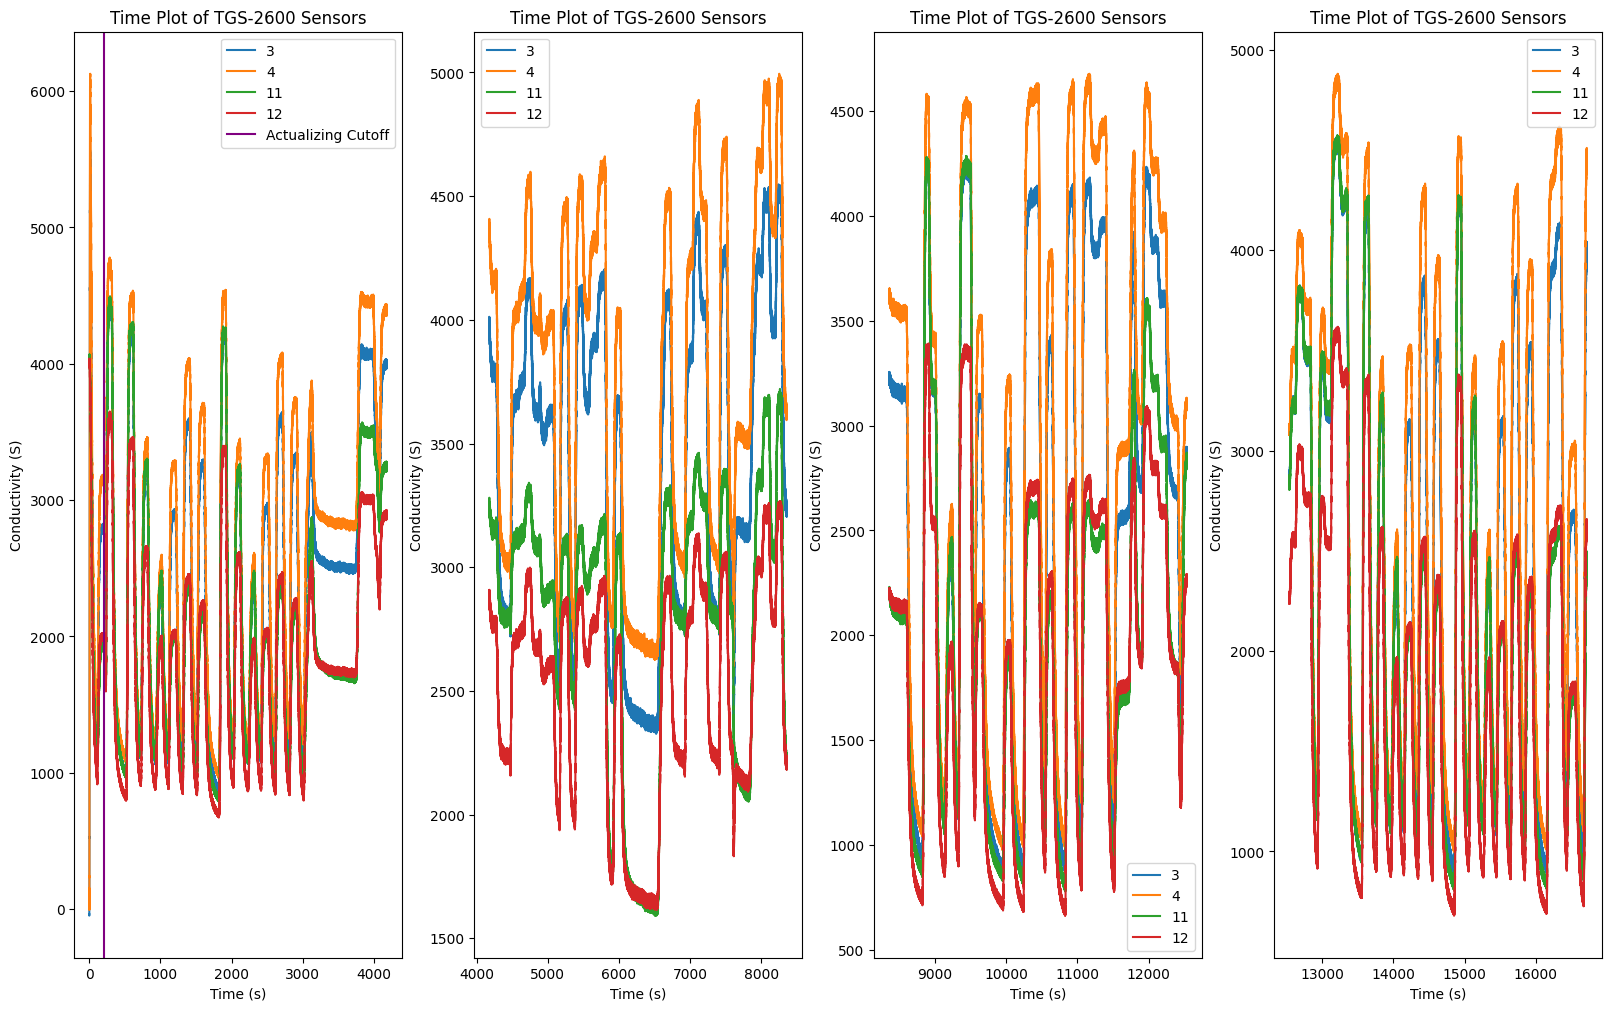

In [10]:
# Plot TG-2600 Sensors Over Time
sensors = [3, 4, 11, 12]
fig_conduct = plt.figure(figsize = (16, 10), layout = "constrained")
# ax_scatter_conduct = fig_conduct.add_subplot(2, 1, 1)
# Cycler for conductivity plots
num_ranges = 4

ax_scatter_conduct_list = [fig_conduct.add_subplot(1, 4, j + 1) for j in range(num_ranges)]
for i in sensors:
    x_label_string = train_df.iloc[:,i].name
    for j in range(num_ranges):
        ax_scatter_conduct = ax_scatter_conduct_list[j]
        ax_scatter_conduct.plot(train_df.iloc[j * train_df.shape[0] // 4: (j + 1) * train_df.shape[0] // 4,0], train_df.iloc[j * train_df.shape[0] // 4: (j + 1) * train_df.shape[0] // 4,i], label = x_label_string)
        ax_scatter_conduct.legend()
        ax_scatter_conduct.set_xlabel("Time (s)")
        ax_scatter_conduct.set_ylabel("Conductivity (S)")
        ax_scatter_conduct.title.set_text("Time Plot of TGS-2600 Sensors") 
        if j > 0:
            ax_scatter_conduct.legend() 
ax_scatter_conduct_list[0].axvline(200, c = "purple", label = "Actualizing Cutoff")
ax_scatter_conduct_list[0].legend()
plt.show()

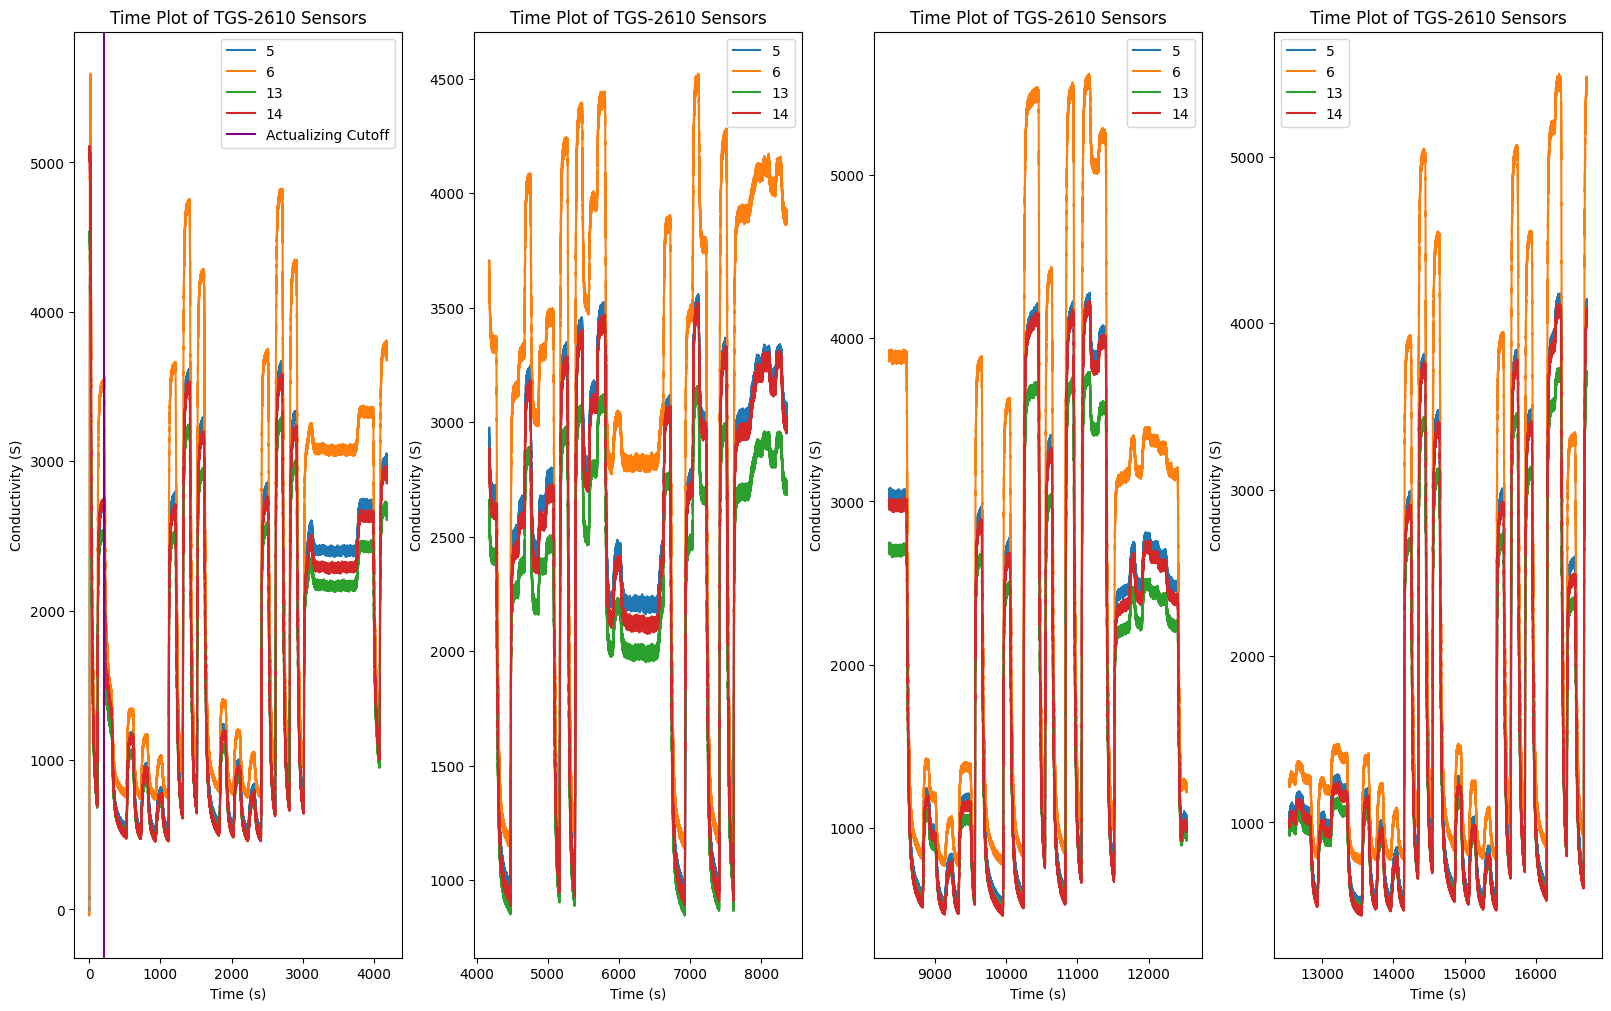

In [9]:
# Plot TG-2610 Sensors Over Time
sensors = [5, 6, 13, 14]
fig_conduct = plt.figure(figsize = (16, 10), layout = "constrained")
# ax_scatter_conduct = fig_conduct.add_subplot(2, 1, 1)
# Cycler for conductivity plots
num_ranges = 4

ax_scatter_conduct_list = [fig_conduct.add_subplot(1, 4, j + 1) for j in range(num_ranges)]
for i in sensors:
    x_label_string = train_df.iloc[:,i].name
    for j in range(num_ranges):
        ax_scatter_conduct = ax_scatter_conduct_list[j]
        ax_scatter_conduct.plot(train_df.iloc[j * train_df.shape[0] // 4: (j + 1) * train_df.shape[0] // 4,0], train_df.iloc[j * train_df.shape[0] // 4: (j + 1) * train_df.shape[0] // 4,i], label = x_label_string)
        ax_scatter_conduct.legend()
        ax_scatter_conduct.set_xlabel("Time (s)")
        ax_scatter_conduct.set_ylabel("Conductivity (S)")
        ax_scatter_conduct.title.set_text("Time Plot of TGS-2610 Sensors") 
        if j > 0:
            ax_scatter_conduct.legend() 
ax_scatter_conduct_list[0].axvline(200, c = "purple", label = "Actualizing Cutoff")
ax_scatter_conduct_list[0].legend()
plt.show()

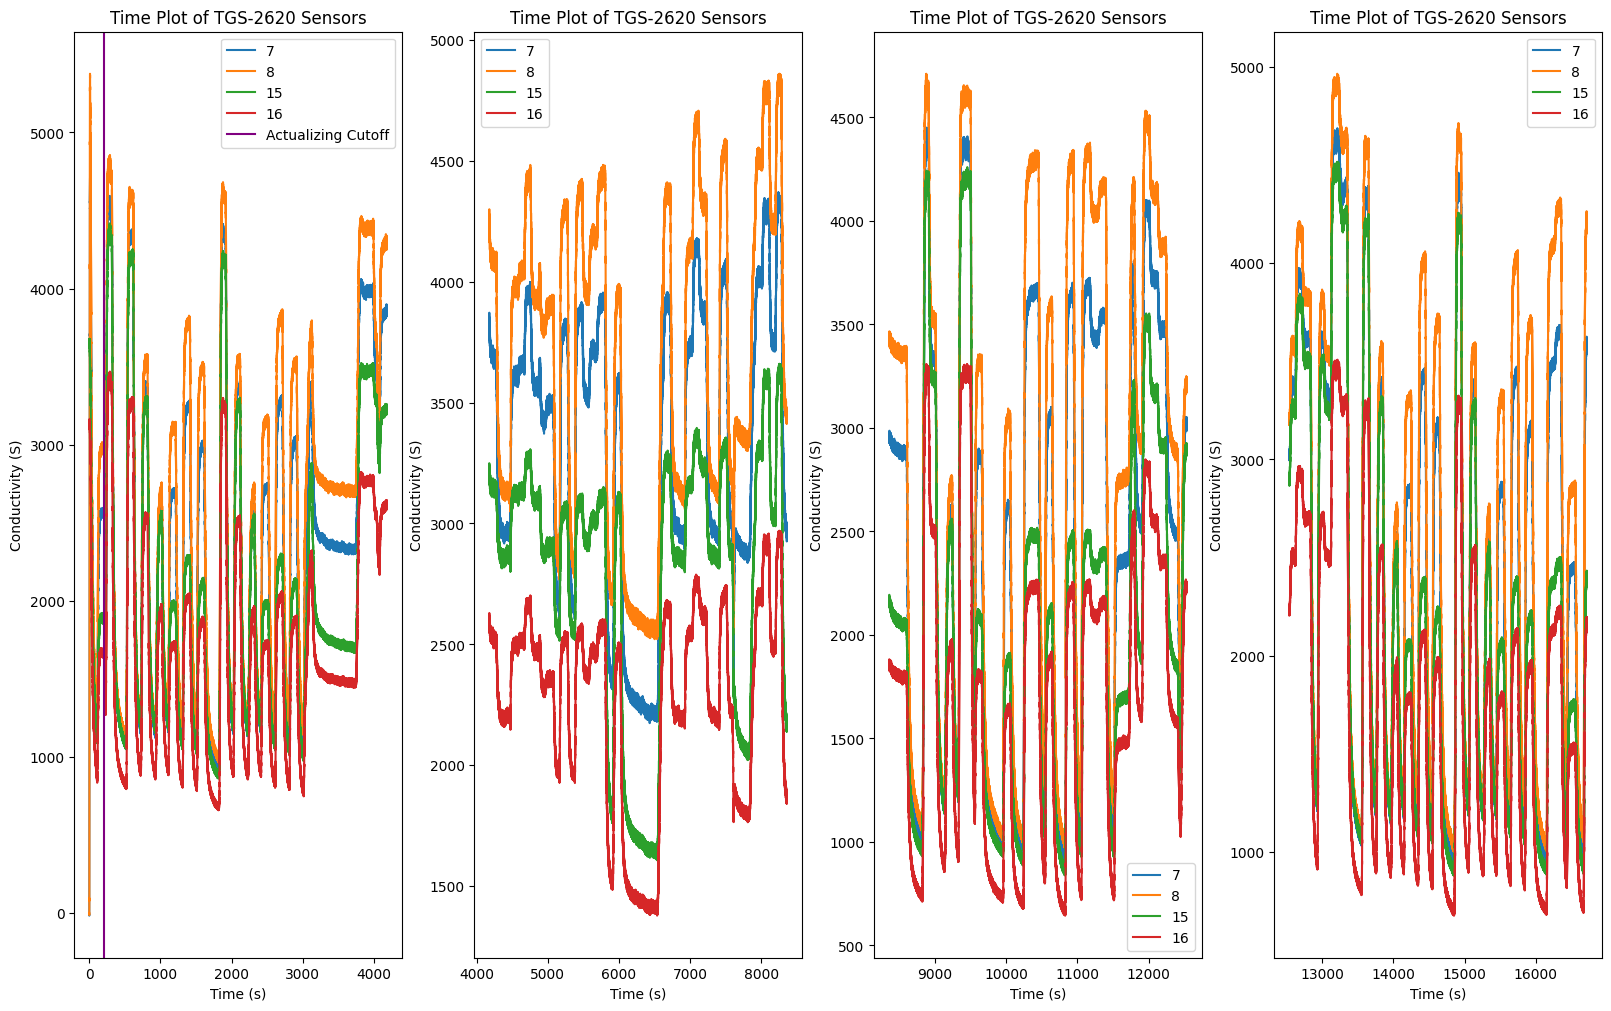

In [12]:
# Plot TG-2620 Sensors Over Time
sensors = [7, 8, 15, 16]
fig_conduct = plt.figure(figsize = (16, 10), layout = "constrained")
# ax_scatter_conduct = fig_conduct.add_subplot(2, 1, 1)
# Cycler for conductivity plots
num_ranges = 4

ax_scatter_conduct_list = [fig_conduct.add_subplot(1, 4, j + 1) for j in range(num_ranges)]
for i in sensors:
    x_label_string = train_df.iloc[:,i].name
    for j in range(num_ranges):
        ax_scatter_conduct = ax_scatter_conduct_list[j]
        ax_scatter_conduct.plot(train_df.iloc[j * train_df.shape[0] // 4: (j + 1) * train_df.shape[0] // 4,0], train_df.iloc[j * train_df.shape[0] // 4: (j + 1) * train_df.shape[0] // 4,i], label = x_label_string)
        ax_scatter_conduct.legend()
        ax_scatter_conduct.set_xlabel("Time (s)")
        ax_scatter_conduct.set_ylabel("Conductivity (S)")
        ax_scatter_conduct.title.set_text("Time Plot of TGS-2620 Sensors") 
        if j > 0:
            ax_scatter_conduct.legend() 
ax_scatter_conduct_list[0].axvline(200, c = "purple", label = "Actualizing Cutoff")
ax_scatter_conduct_list[0].legend()
plt.show()

# Remove first 200 seconds -> sensor are actualizing first 200 seconds

In [7]:
train_df = train_df[20000:]
x1_train = x1_train[20000:]
y_train = y_train[20000:]

# Sensor 2 is clearly broken. We need to remove it going forward.

In [8]:
# Contain all sensors except sensor 2
good_x_cols = ['Time', '1','3','4','5','6','7','8','9','10','11','12','13','14','15','16']
good_sensor_cols = ['1','3','4','5','6','7','8','9','10','11','12','13','14','15','16']

# Get Specific Y Values

In [9]:
y_meth_train = y_train["Methane Bin"]
y_meth_test = y_test["Methane Bin"]
y_ethy_train = y_train["Ethylene Bin"]
y_ethy_test = y_test["Ethylene Bin"]

In [10]:
y_meth_train_vals = y_meth_train.values
y_meth_test_vals = y_meth_test.values
y_ethy_train_vals = y_ethy_train.values
y_ethy_test_vals = y_ethy_test.values

# F Tests and Mutual Info Tests

In [11]:
# Do f tests
f_test_meth, f_test_meth_p_vals = f_regression(x1_train[good_sensor_cols], y_meth_train)
f_test_meth_norm = f_test_meth / np.max(f_test_meth)
f_test_ethy, f_test_ethy_p_vals = f_regression(x1_train[good_sensor_cols], y_ethy_train)
f_test_ethy_norm = f_test_ethy / np.max(f_test_ethy)

In [12]:
f_test_meth, f_test_ethy

(array([3.22131455e+03, 3.55686793e+05, 4.15983791e+05, 2.17830873e+06,
        2.22250303e+06, 2.52256092e+05, 3.86757122e+05, 1.23015488e+03,
        6.87724454e+03, 2.81097691e+04, 1.81711609e+05, 2.31503517e+06,
        2.18824786e+06, 2.91654811e+04, 8.79954335e+04]),
 array([6.53550208e+05, 3.32188092e+05, 2.85965929e+05, 1.17671459e+02,
        3.44159310e+03, 5.45055963e+05, 4.19110325e+05, 6.88440457e+05,
        6.30594384e+05, 8.08117499e+05, 5.18680069e+05, 3.10594137e+02,
        5.36927134e+00, 1.03768475e+06, 8.21635151e+05]))

In [13]:
f_test_meth_norm, f_test_ethy_norm

(array([1.39147543e-03, 1.53642069e-01, 1.79687892e-01, 9.40939798e-01,
        9.60029918e-01, 1.08964259e-01, 1.67063173e-01, 5.31376322e-04,
        2.97068685e-03, 1.21422644e-02, 7.84919432e-02, 1.00000000e+00,
        9.45233093e-01, 1.25982886e-02, 3.80104089e-02]),
 array([6.29815761e-01, 3.20124290e-01, 2.75580739e-01, 1.13398081e-04,
        3.31660758e-03, 5.25261612e-01, 4.03889839e-01, 6.63438929e-01,
        6.07693605e-01, 7.78769758e-01, 4.99843590e-01, 2.99314544e-04,
        5.17427991e-06, 1.00000000e+00, 7.91796500e-01]))

In [28]:
f_test_meth_p_vals, f_test_ethy_p_vals

(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]))

In [14]:
# Do mutual information tests
mi_meth = mutual_info_regression(x1_train[good_sensor_cols], y_meth_train)
mi_meth_norm = mi_meth /np.max(mi_meth)
print("Got MI Methane Info:", mi_meth)
print("Normalized:", mi_meth_norm)
mi_ethy = mutual_info_regression(x1_train[good_sensor_cols], y_ethy_train)
mi_ethy_norm = mi_ethy / np.max(mi_ethy)
print("Got MI Ethylene Info:", mi_ethy)
print("Normalized:", mi_ethy_norm)

Got MI Methane Info: [0.0965025  0.19661028 0.20863344 0.42846336 0.43615041 0.24324472
 0.24939912 0.0890766  0.09840987 0.17161694 0.20347724 0.43137242
 0.42713055 0.2120435  0.2074063 ]
Normalized: [0.22125969 0.45078551 0.47835205 0.98237523 1.         0.55770834
 0.57181906 0.20423368 0.22563288 0.39348108 0.46652997 0.9890451
 0.97931938 0.4861706  0.47553846]
Got MI Ethylene Info: [0.21955207 0.15398766 0.15168714 0.16549356 0.19021294 0.21738343
 0.18397368 0.22287863 0.21578818 0.28890513 0.20380368 0.15619896
 0.1565636  0.32949653 0.28437954]
Normalized: [0.66632591 0.46734229 0.46036035 0.50226192 0.5772836  0.65974422
 0.55834786 0.67642178 0.65490274 0.87680783 0.6185306  0.47405345
 0.47516009 1.         0.86307294]


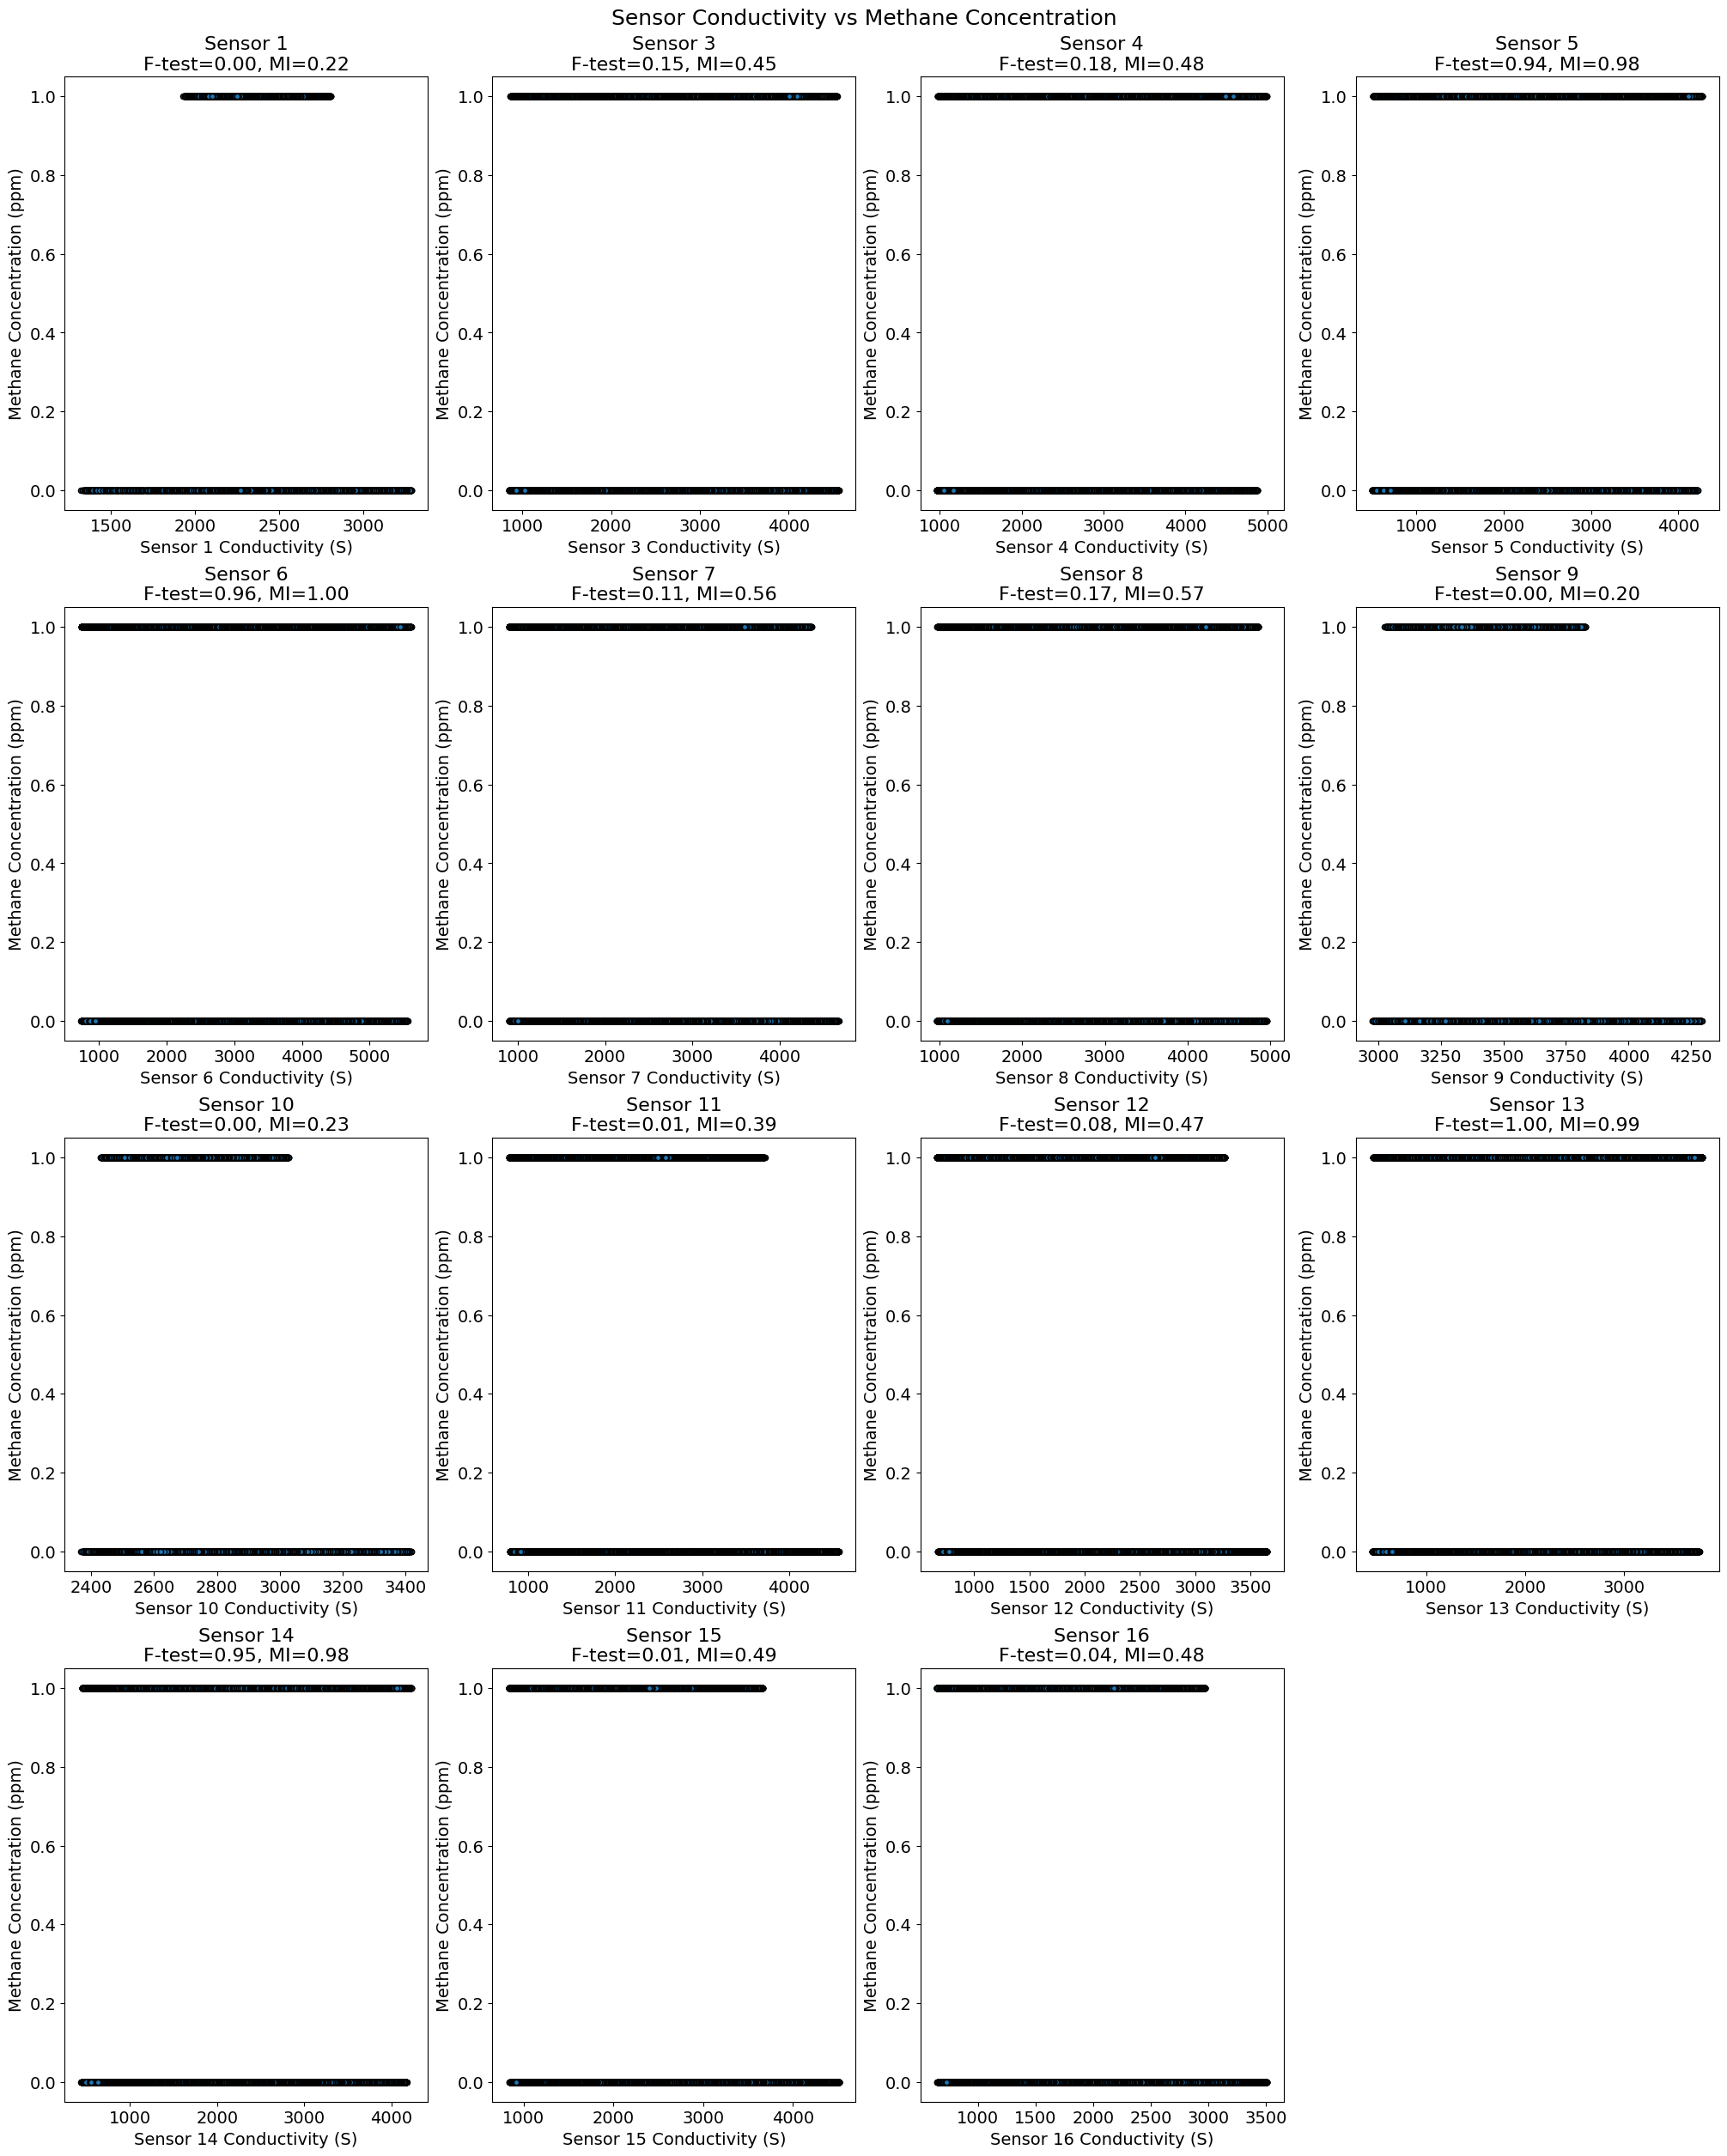

In [15]:
# Plot features vs methane, also display normalized f test features and normalized mutual info features
plt.figure(figsize=(20, 25), layout = "constrained")
num_features = len(good_sensor_cols)
for i in range(num_features):
    feature_name = x1_train[good_sensor_cols].columns[i]
    plt.subplot((num_features + 4) // 4, 4, i + 1)
    plt.scatter(x1_train[good_sensor_cols].iloc[:,i], y_meth_train, edgecolor="black", s=20)
    plt.xlabel("Sensor " + feature_name + " Conductivity (S)", fontsize= 14)
    plt.ylabel("Methane Concentration (ppm)", fontsize= 14)
    plt.title("Sensor {}\nF-test={:.2f}, MI={:.2f}".format(feature_name, f_test_meth_norm[i], mi_meth_norm[i]), fontsize=16)
    plt.tick_params(labelsize = 14)
plt.suptitle("Sensor Conductivity vs Methane Concentration", fontsize= 18)
plt.show()

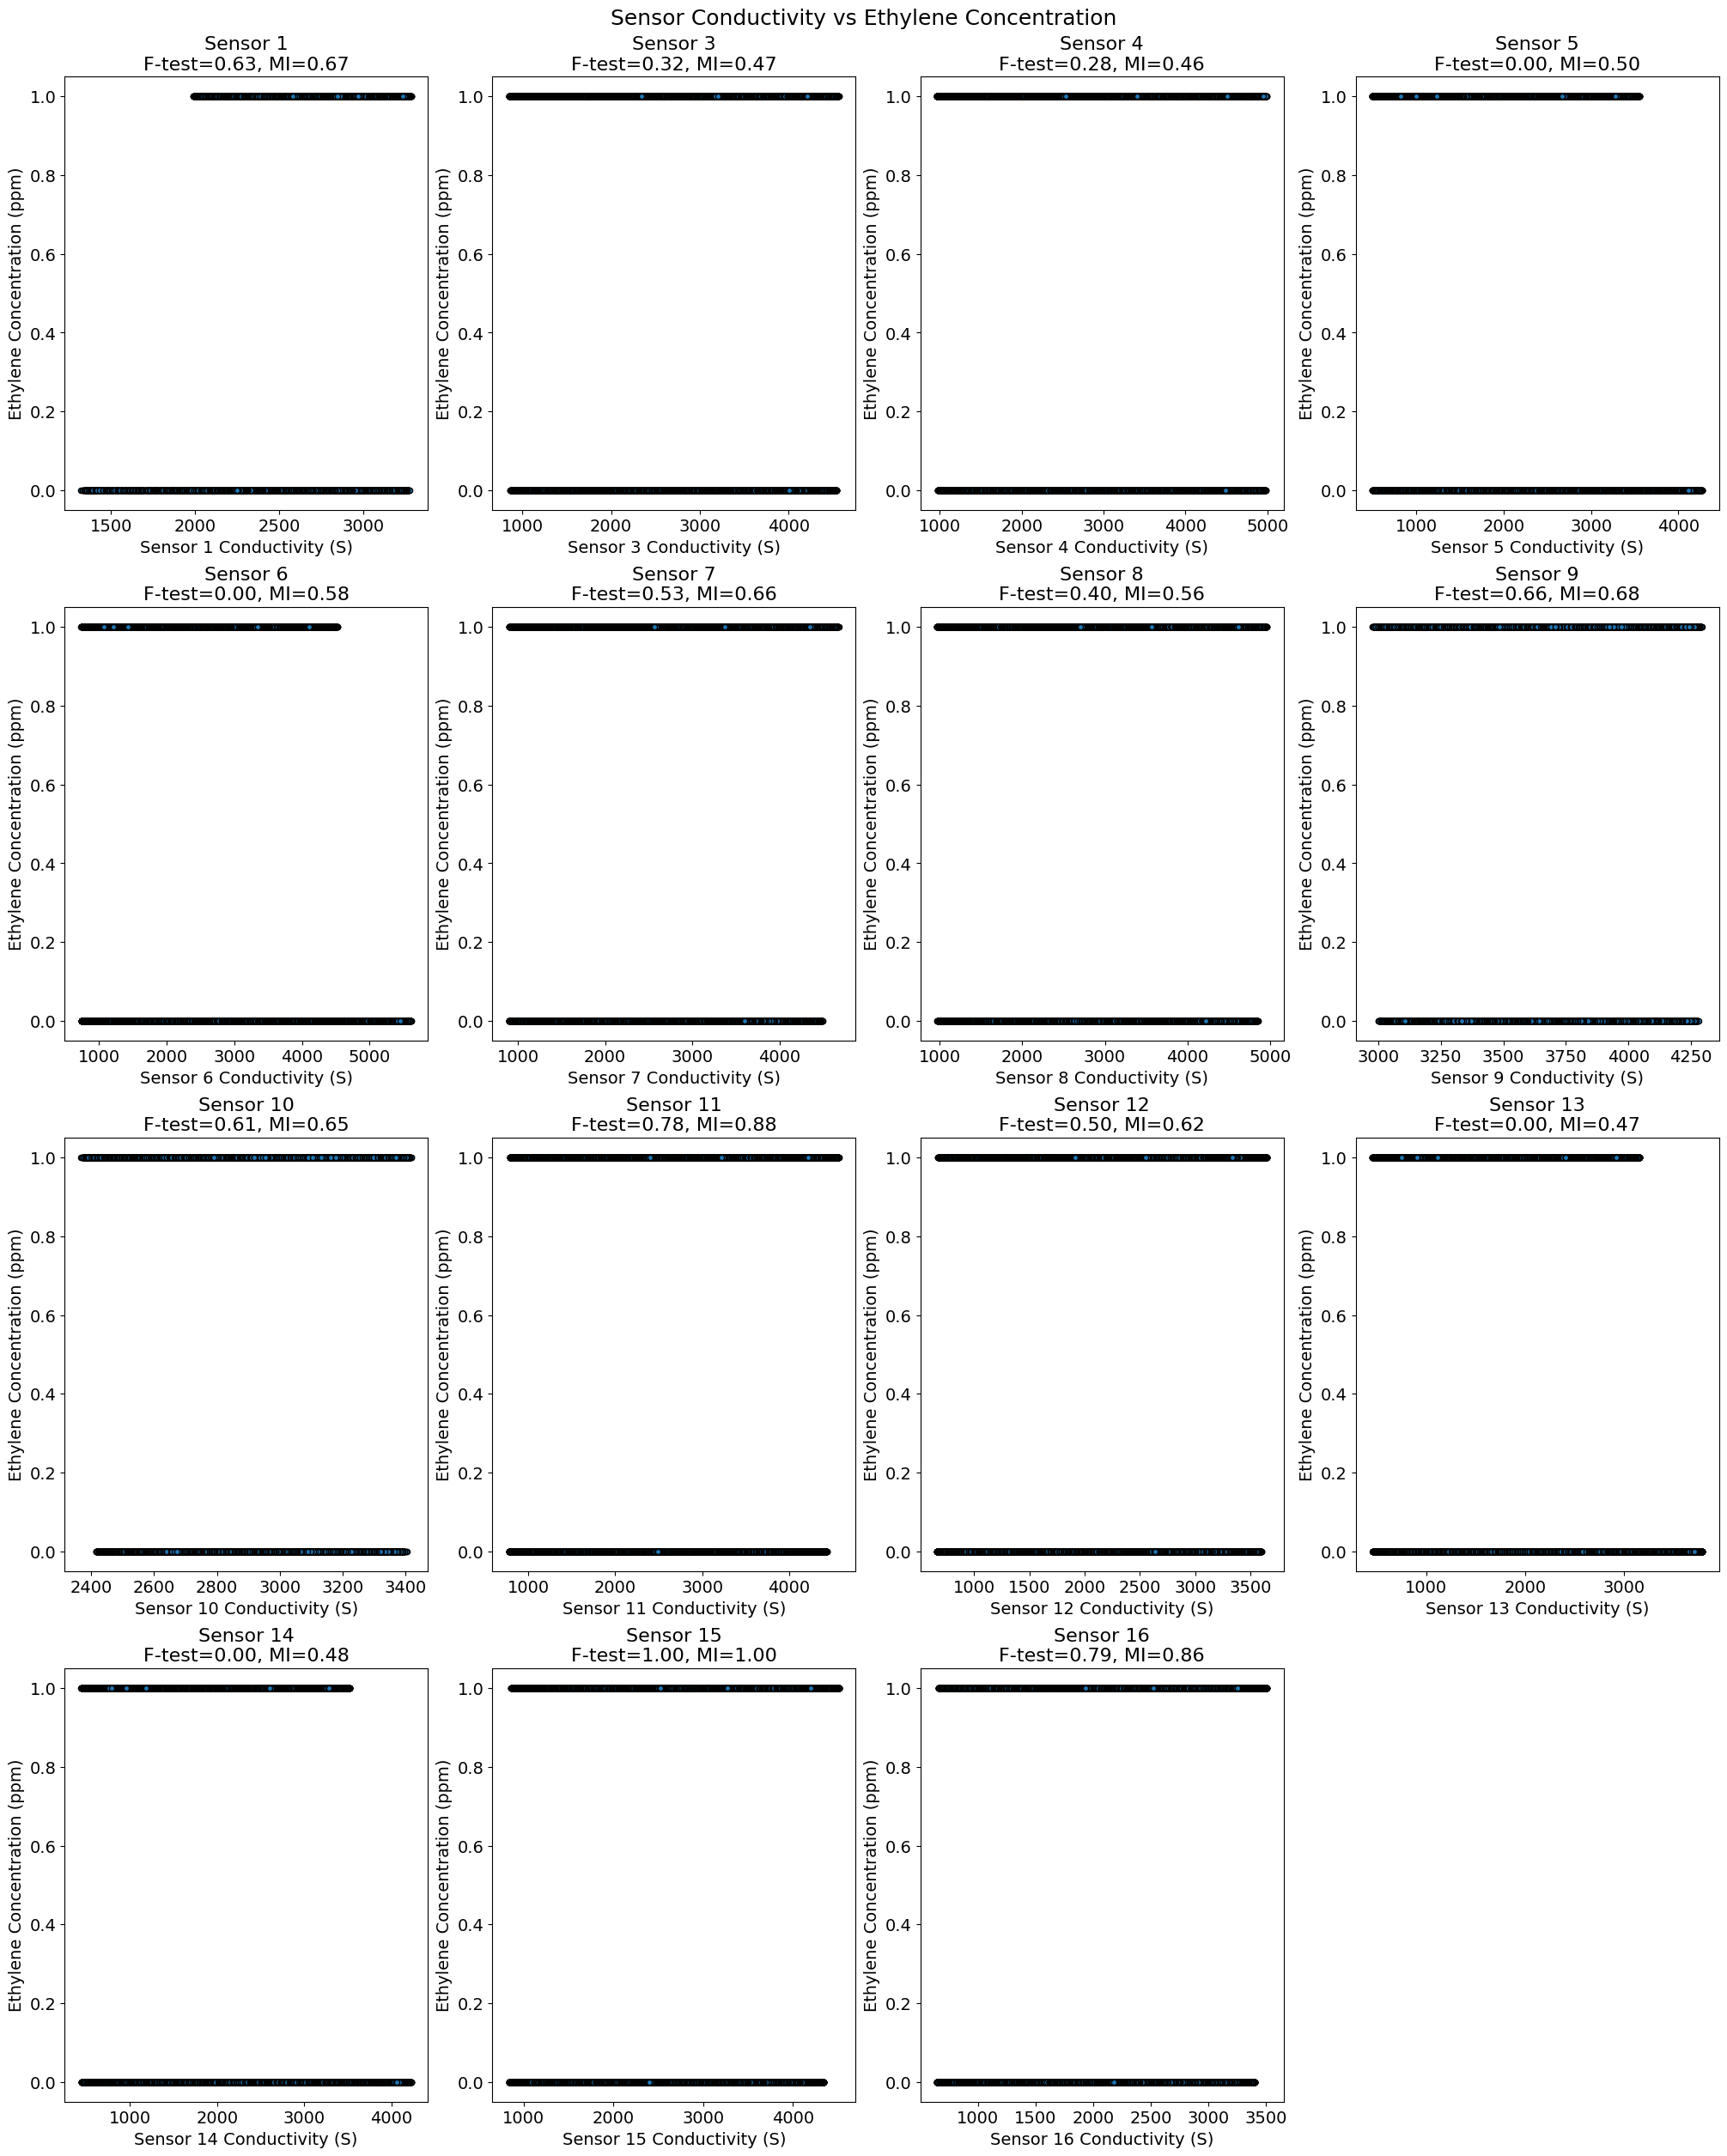

In [16]:
# Plot features vs ethylene
plt.figure(figsize=(20, 25), layout = "constrained")
num_features = len(good_sensor_cols)
for i in range(num_features):
    feature_name = x1_train[good_sensor_cols].columns[i]
    plt.subplot((num_features + 4) // 4, 4, i + 1)
    plt.scatter(x1_train[good_sensor_cols].iloc[:,i], y_ethy_train, edgecolor="black", s=20)
    plt.xlabel("Sensor " + feature_name + " Conductivity (S)", fontsize= 14)
    plt.ylabel("Ethylene Concentration (ppm)", fontsize= 14)
    plt.title("Sensor {}\nF-test={:.2f}, MI={:.2f}".format(feature_name, f_test_ethy_norm[i], mi_ethy_norm[i]), fontsize=16)
    plt.tick_params(labelsize = 14)
plt.suptitle("Sensor Conductivity vs Ethylene Concentration", fontsize= 18)
plt.show()

##  Do bar plots of the F-test values and minimum info test values

In [17]:
tuples_f_test_meth = sorted(zip(f_test_meth, x1_train[good_sensor_cols].columns), reverse=True)
meth_f_score_list, meth_f_test_features = [t[0] for t in tuples_f_test_meth], [t[1] for t in tuples_f_test_meth]
tuples_f_test_ethy = sorted(zip(f_test_ethy, x1_train[good_sensor_cols].columns), reverse=True)
ethy_f_score_list, ethy_f_test_features = [t[0] for t in tuples_f_test_ethy], [t[1] for t in tuples_f_test_ethy]
tuples_mi_meth = sorted(zip(mi_meth , x1_train[good_sensor_cols].columns), reverse=True)
meth_mi_score_list, meth_mi_features = [t[0] for t in tuples_mi_meth], [t[1] for t in tuples_mi_meth]
tuples_mi_ethy = sorted(zip(mi_ethy, x1_train[good_sensor_cols].columns), reverse=True)
ethy_mi_score_list, ethy_mi_features = [t[0] for t in tuples_mi_ethy], [t[1] for t in tuples_mi_ethy]

Text(0.5, 1.0, 'Ethylene Mutual Info Values of Features')

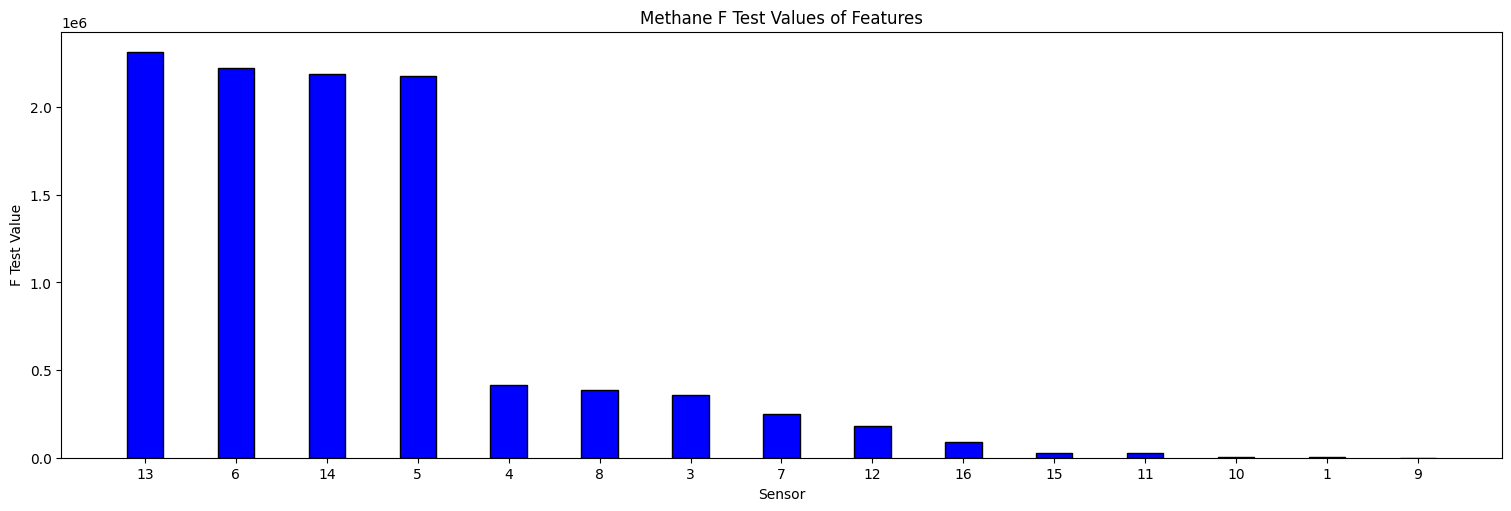

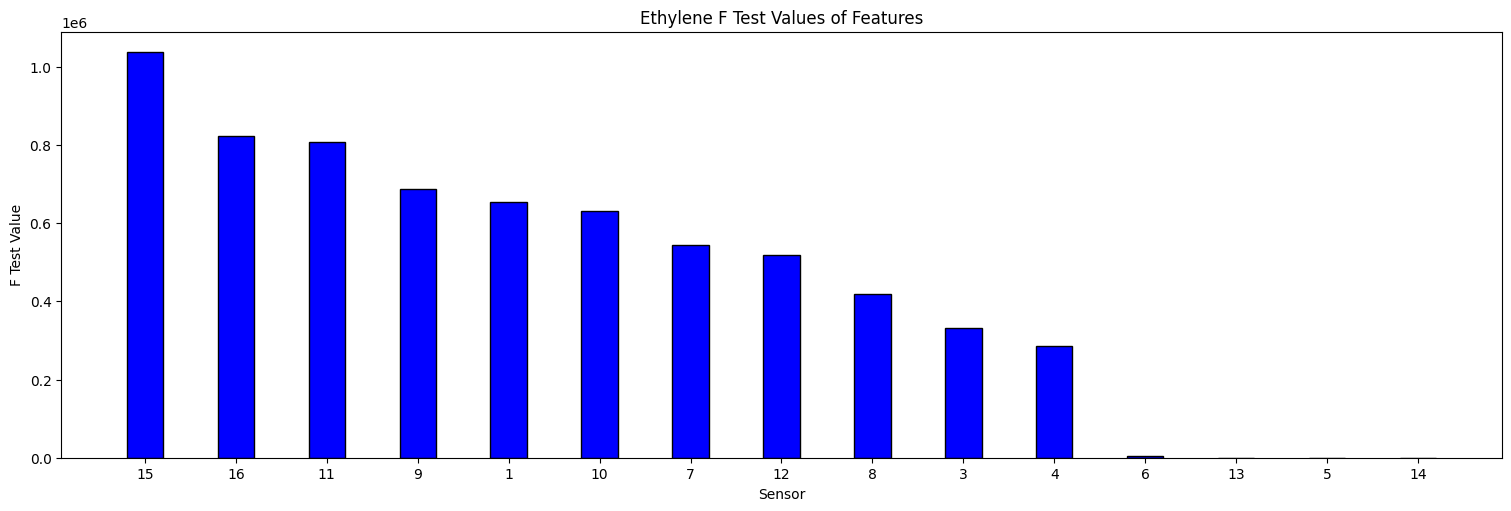

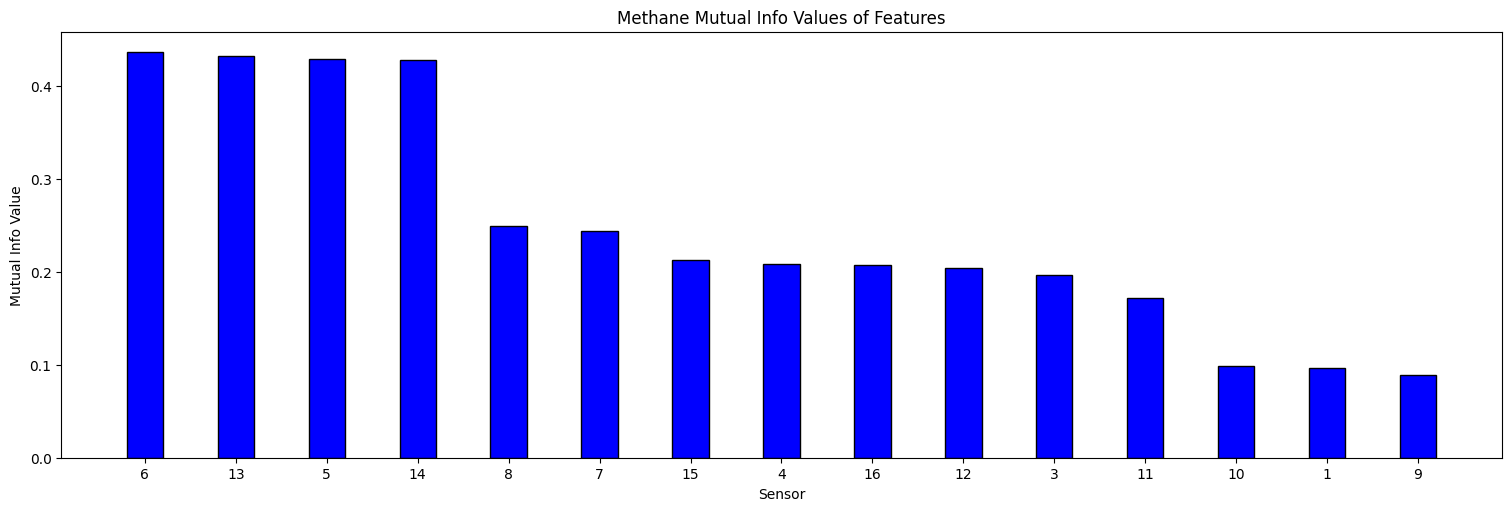

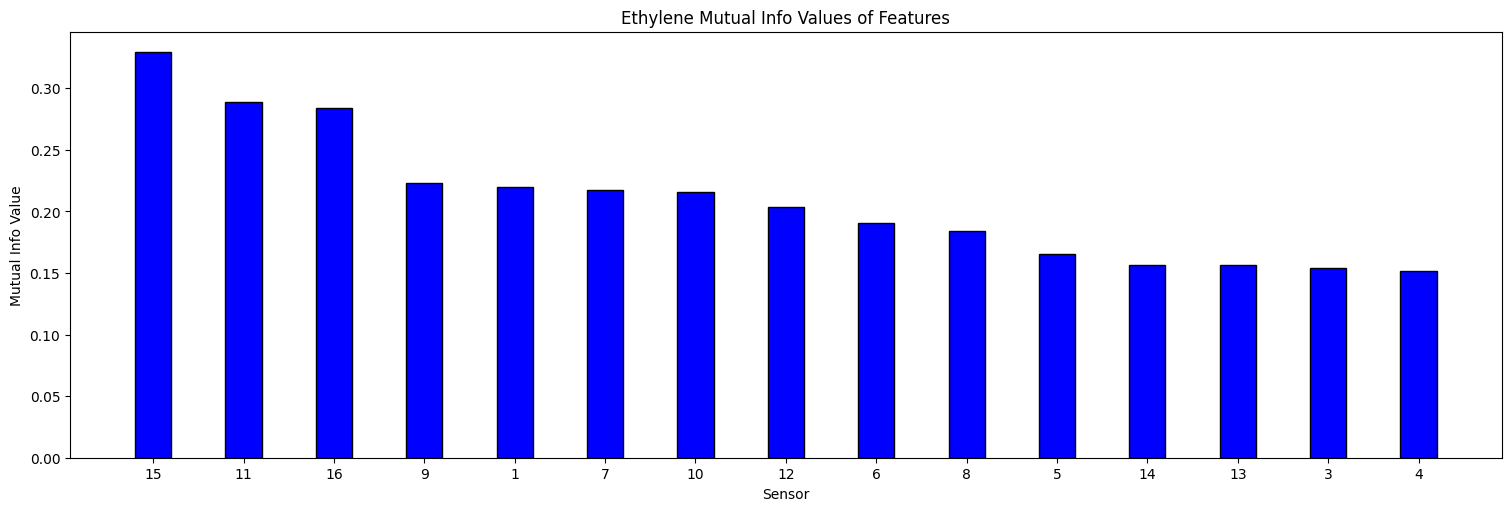

In [18]:
fig = plt.figure(figsize = (15, 5), layout = "constrained")
ax1 = fig.add_subplot(1, 1, 1)
ax1.bar(meth_f_test_features, meth_f_score_list, color = 'blue', edgecolor='black', width = 0.4)
ax1.set_ylabel("F Test Value")
ax1.set_xlabel("Sensor")
ax1.set_title("Methane F Test Values of Features")

fig = plt.figure(figsize = (15, 5), layout = "constrained")
ax1 = fig.add_subplot(1, 1, 1)
ax1.bar(ethy_f_test_features, ethy_f_score_list, color = 'blue', edgecolor='black', width = 0.4)
ax1.set_ylabel("F Test Value")
ax1.set_xlabel("Sensor")
ax1.set_title("Ethylene F Test Values of Features")

fig = plt.figure(figsize = (15, 5), layout = "constrained")
ax1 = fig.add_subplot(1, 1, 1)
ax1.bar(meth_mi_features, meth_mi_score_list, color = 'blue', edgecolor='black', width = 0.4)
ax1.set_ylabel("Mutual Info Value")
ax1.set_xlabel("Sensor")
ax1.set_title("Methane Mutual Info Values of Features")

fig = plt.figure(figsize = (15, 5), layout = "constrained")
ax1 = fig.add_subplot(1, 1, 1)
ax1.bar(ethy_mi_features, ethy_mi_score_list, color = 'blue', edgecolor='black', width = 0.4)
ax1.set_ylabel("Mutual Info Value")
ax1.set_xlabel("Sensor")
ax1.set_title("Ethylene Mutual Info Values of Features")

## Do bar plots of the normalized F-test values and minimum info test values

In [19]:
tuples_f_test_meth_norm = sorted(zip(f_test_meth_norm, x1_train[good_sensor_cols].columns), reverse=True)
meth_f_score_list_norm, meth_f_test_features_norm = [t[0] for t in tuples_f_test_meth_norm], [t[1] for t in tuples_f_test_meth_norm]
tuples_f_test_ethy_norm = sorted(zip(f_test_ethy_norm, x1_train[good_sensor_cols].columns), reverse=True)
ethy_f_score_list_norm, ethy_f_test_features_norm = [t[0] for t in tuples_f_test_ethy_norm], [t[1] for t in tuples_f_test_ethy_norm]
tuples_mi_meth_norm = sorted(zip(mi_meth_norm, x1_train[good_sensor_cols].columns), reverse=True)
meth_mi_score_list_norm, meth_mi_features_norm = [t[0] for t in tuples_mi_meth_norm], [t[1] for t in tuples_mi_meth_norm]
tuples_mi_ethy_norm = sorted(zip(mi_ethy_norm, x1_train[good_sensor_cols].columns), reverse=True)
ethy_mi_score_list_norm, ethy_mi_features_norm = [t[0] for t in tuples_mi_ethy_norm], [t[1] for t in tuples_mi_ethy_norm]

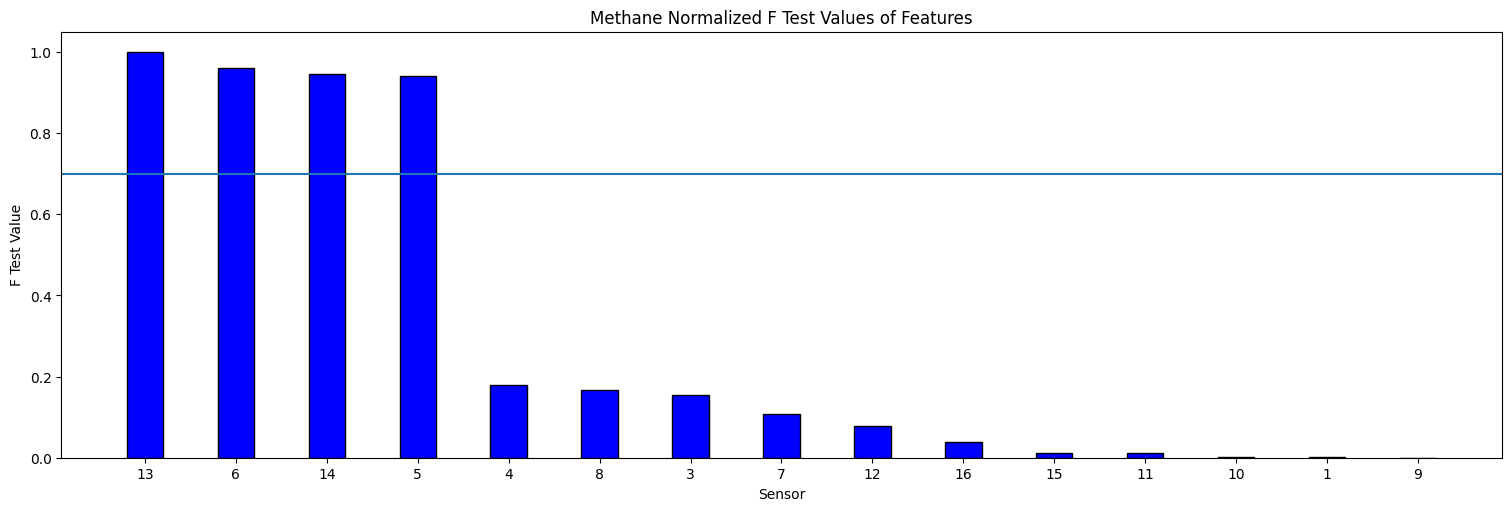

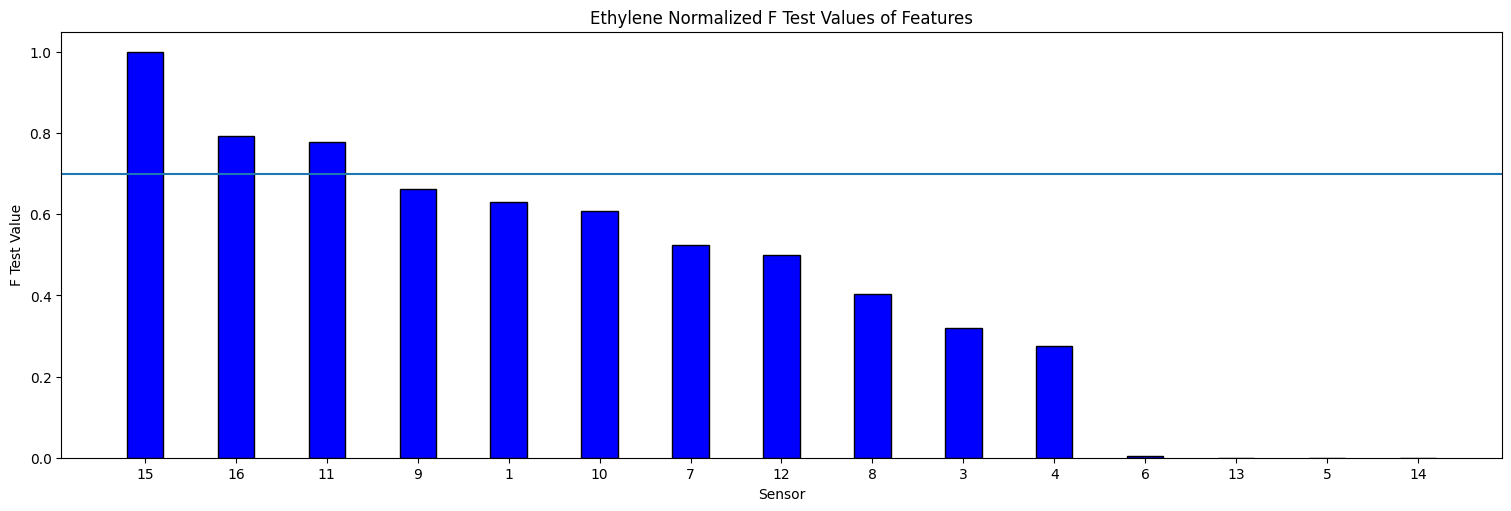

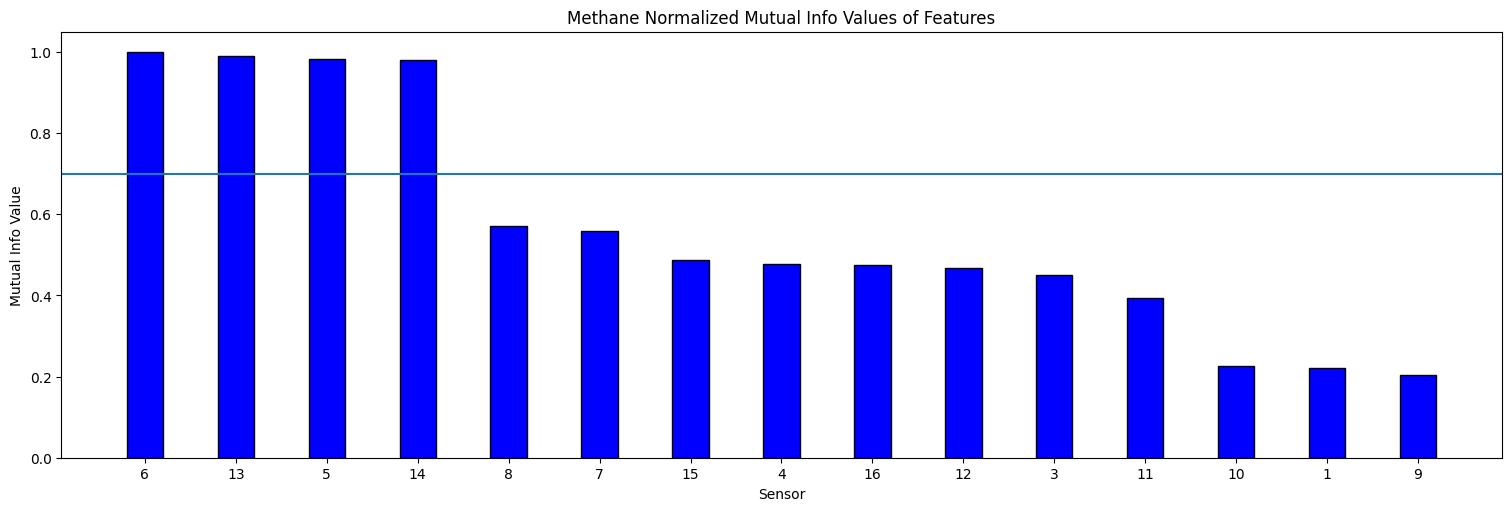

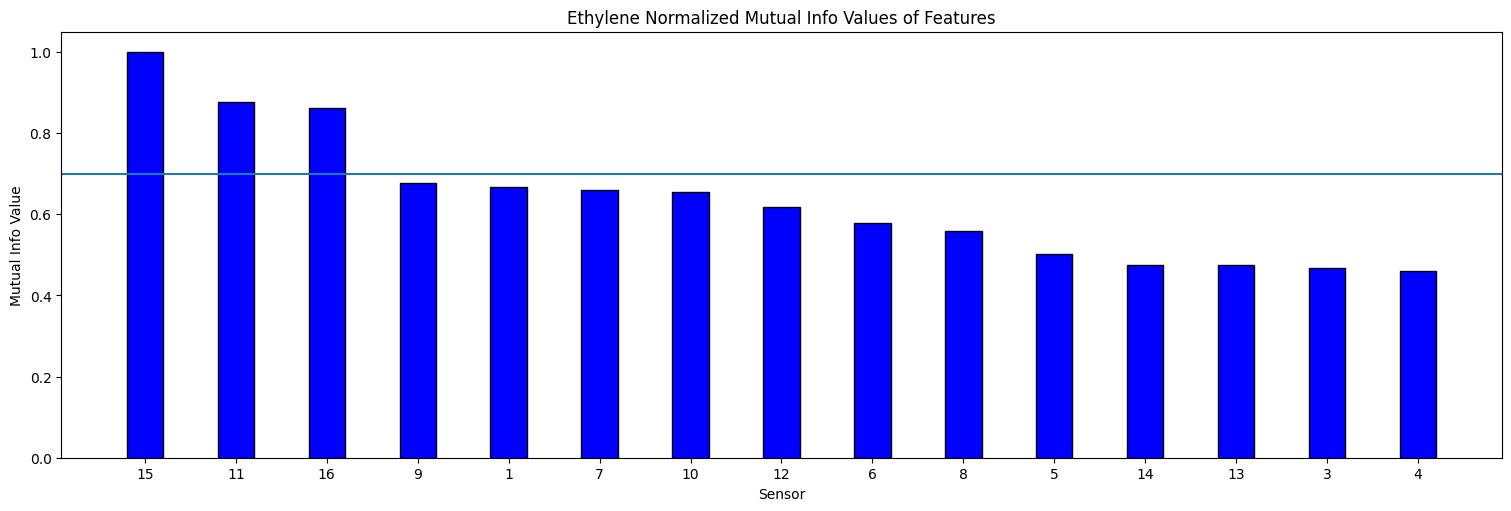

In [20]:
cutoff = 0.7
fig = plt.figure(figsize = (15, 5), layout = "constrained")
ax1 = fig.add_subplot(1, 1, 1)
ax1.bar(meth_f_test_features_norm, meth_f_score_list_norm, color = 'blue', edgecolor='black', width = 0.4)
ax1.set_ylabel("F Test Value")
ax1.set_xlabel("Sensor")
ax1.set_title("Methane Normalized F Test Values of Features")
ax1.axhline(cutoff)

fig = plt.figure(figsize = (15, 5), layout = "constrained")
ax1 = fig.add_subplot(1, 1, 1)
ax1.bar(ethy_f_test_features_norm, ethy_f_score_list_norm, color = 'blue', edgecolor='black', width = 0.4)
ax1.set_ylabel("F Test Value")
ax1.set_xlabel("Sensor")
ax1.set_title("Ethylene Normalized F Test Values of Features")
ax1.axhline(cutoff)

fig = plt.figure(figsize = (15, 5), layout = "constrained")
ax1 = fig.add_subplot(1, 1, 1)
ax1.bar(meth_mi_features_norm, meth_mi_score_list_norm, color = 'blue', edgecolor='black', width = 0.4)
ax1.set_ylabel("Mutual Info Value")
ax1.set_xlabel("Sensor")
ax1.set_title("Methane Normalized Mutual Info Values of Features")
ax1.axhline(cutoff)

fig = plt.figure(figsize = (15, 5), layout = "constrained")
ax1 = fig.add_subplot(1, 1, 1)
ax1.bar(ethy_mi_features_norm, ethy_mi_score_list_norm, color = 'blue', edgecolor='black', width = 0.4)
ax1.set_ylabel("Mutual Info Value")
ax1.set_xlabel("Sensor")
ax1.set_title("Ethylene Normalized Mutual Info Values of Features")
ax1.axhline(cutoff)

# Now remove Senors that fall below the cutoff
Cutoff is drop sensors with F-test and mutual info test less than 0.7

In [21]:

# go through and find sensors that don't meet the cutoff
good_meth_sensors = []
good_ethy_sensors = []

# Create a dictionary of the tuples containing both the feature name and list, so we can give the sensor name and get a score value back
mi_meth_norm_dict = {v: k for k, v in dict(tuples_mi_meth_norm).items()} 
mi_ethy_norm_dict = {v: k for k, v in dict(tuples_mi_ethy_norm).items()} 

for i in range(len(meth_f_test_features_norm)):
    curr_sensor = meth_f_test_features_norm[i]
    # Keep the sensor if it meets the cutoff
    if not (meth_f_score_list_norm[i] < cutoff and mi_meth_norm_dict[curr_sensor] < cutoff):
        good_meth_sensors.append(curr_sensor)
for i in range(len(ethy_f_test_features_norm)):
    curr_sensor = ethy_f_test_features_norm[i]
    # Keep the sensor if it meets the cutoff
    if not (ethy_f_score_list_norm[i] < cutoff and mi_ethy_norm_dict[curr_sensor] < cutoff):
        good_ethy_sensors.append(curr_sensor)   
print("Kept methane sensors:", good_meth_sensors, "\nKept ethylene sensors:", good_ethy_sensors)


Kept methane sensors: ['13', '6', '14', '5'] 
Kept ethylene sensors: ['15', '16', '11']


In [9]:
good_meth_sensors = ['13', '6', '14', '5']
good_ethy_sensors = ['15', '16', '11']

Note: We would remove sensor 2 if it showed up here since it's broken.

In [22]:
meth_cutoff_train = x1_train[good_meth_sensors]
meth_cutoff_test = x1_test[good_meth_sensors]
ethy_cutoff_train = x1_train[good_ethy_sensors]
ethy_cutoff_test = x1_test[good_ethy_sensors]

In [33]:
meth_cutoff_train

5       12       13        4
20000    2712.07  2004.92  2512.73  3143.37
20001    2711.55  2009.62  2489.84  3148.43
20002    2711.02  1989.70  2492.38  3132.98
20003    2713.39  2000.70  2515.02  3144.21
20004    2703.14  2001.41  2519.87  3149.84
...          ...      ...      ...      ...
1671396  4100.80  2635.74  3681.30  4493.98
1671397  4119.92  2637.81  3699.91  4498.09
1671398  4108.57  2644.32  3687.70  4483.05
1671399  4103.71  2645.62  3698.39  4491.59
1671400  4116.03  2636.26  3710.92  4484.08

[1651401 rows x 4 columns]

In [357]:
ethy_cutoff_train


14       15       10        6        5
1671401  4069.16  2411.37  2656.04  5453.49  4102.74
1671402  4059.17  2378.36  2665.17  5454.66  4105.01
1671403  4054.03  2424.17  2681.11  5448.83  4115.70
1671404  4070.44  2421.15  2672.22  5451.55  4103.06
1671405  4066.26  2415.88  2677.45  5444.95  4108.89
...          ...      ...      ...      ...      ...
2924947  2409.11  1574.11  2688.19  3251.66  2476.65
2924948  2413.38  1547.79  2683.99  3259.38  2473.10
2924949  2400.85  1565.83  2688.97  3270.55  2458.18
2924950  2392.34  1563.87  2680.33  3245.95  2470.82
2924951  2403.10  1567.35  2691.07  3257.09  2472.85

[1253551 rows x 5 columns]

In [358]:
ethy_cutoff_test.info(), meth_cutoff_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1253551 entries, 1671401 to 2924951
Data columns (total 5 columns):
 #   Column  Non-Null Count    Dtype  
---  ------  --------------    -----  
 0   14      1253551 non-null  float64
 1   15      1253551 non-null  float64
 2   10      1253551 non-null  float64
 3   6       1253551 non-null  float64
 4   5       1253551 non-null  float64
dtypes: float64(5)
memory usage: 57.4 MB
<class 'pandas.core.frame.DataFrame'>
Index: 1253551 entries, 1671401 to 2924951
Data columns (total 4 columns):
 #   Column  Non-Null Count    Dtype  
---  ------  --------------    -----  
 0   5       1253551 non-null  float64
 1   12      1253551 non-null  float64
 2   13      1253551 non-null  float64
 3   4       1253551 non-null  float64
dtypes: float64(4)
memory usage: 47.8 MB


(None, None)

# Feature Engineering

We need to add historical measurements as features. 

In [359]:
meth_cutoff_train

5       12       13        4
20000    2712.07  2004.92  2512.73  3143.37
20001    2711.55  2009.62  2489.84  3148.43
20002    2711.02  1989.70  2492.38  3132.98
20003    2713.39  2000.70  2515.02  3144.21
20004    2703.14  2001.41  2519.87  3149.84
...          ...      ...      ...      ...
1671396  4100.80  2635.74  3681.30  4493.98
1671397  4119.92  2637.81  3699.91  4498.09
1671398  4108.57  2644.32  3687.70  4483.05
1671399  4103.71  2645.62  3698.39  4491.59
1671400  4116.03  2636.26  3710.92  4484.08

[1651401 rows x 4 columns]

In [67]:
meth_cutoff_train.shift(1).bfill()

6       13       14        5
20000        NaN      NaN      NaN      NaN
20001    3518.45  2512.73  2712.34  2712.07
20002    3527.97  2489.84  2716.81  2711.55
20003    3534.23  2492.38  2708.13  2711.02
20004    3517.26  2515.02  2704.98  2713.39
...          ...      ...      ...      ...
1671396  5450.38  3658.19  4064.97  4114.08
1671397  5460.10  3681.30  4032.20  4100.80
1671398  5436.02  3699.91  4079.47  4119.92
1671399  5455.44  3687.70  4085.28  4108.57
1671400  5415.11  3698.39  4048.25  4103.71

[1651401 rows x 4 columns]

In [23]:
def get_historical_measurements(orig_df, window_size, sampling_rate):
    '''Appends historical measurements to a dataframe'''
    orig_cols = orig_df.columns
    # Go through and make the window and append it as features. There will be window_size / sampling_rate features added for each feature
    for i in range(window_size//sampling_rate):
        # Shift the values over (get time t - 1)
        shift_val = sampling_rate * (i + 1)
        orig_df_shifted = orig_df[orig_cols].shift(shift_val).bfill()
        orig_df_shifted.columns = ["{}_(t-{})".format(col, shift_val) for col in list(orig_df_shifted.columns)]
        orig_df = pd.concat([orig_df, orig_df_shifted], axis = 1)
    return orig_df

In [25]:
window_size = 50
sampling_rate = 5

In [26]:
meth_historical_train = get_historical_measurements(meth_cutoff_train, window_size, sampling_rate)
ethy_historical_train = get_historical_measurements(ethy_cutoff_train, window_size, sampling_rate)
meth_historical_test = get_historical_measurements(meth_cutoff_test, window_size, sampling_rate)
ethy_historical_test = get_historical_measurements(ethy_cutoff_test, window_size, sampling_rate)

In [69]:
meth_historical_train.columns

Index(['6', '13', '14', '5', '6_(t-5)', '13_(t-5)', '14_(t-5)', '5_(t-5)',
       '6_(t-10)', '13_(t-10)', '14_(t-10)', '5_(t-10)', '6_(t-15)',
       '13_(t-15)', '14_(t-15)', '5_(t-15)', '6_(t-20)', '13_(t-20)',
       '14_(t-20)', '5_(t-20)', '6_(t-25)', '13_(t-25)', '14_(t-25)',
       '5_(t-25)', '6_(t-30)', '13_(t-30)', '14_(t-30)', '5_(t-30)',
       '6_(t-35)', '13_(t-35)', '14_(t-35)', '5_(t-35)', '6_(t-40)',
       '13_(t-40)', '14_(t-40)', '5_(t-40)', '6_(t-45)', '13_(t-45)',
       '14_(t-45)', '5_(t-45)', '6_(t-50)', '13_(t-50)', '14_(t-50)',
       '5_(t-50)'],
      dtype='object')

We need to get features.
Statistical - Mean, median, Range, Standard Deviation, Max, Min, Kurtosis, Skewness 
Time / Frequency - Autocorrelation, entropy, Positive Turning, Negative Turning, Peak to peak distance

In [70]:
meth_cutoff_train.iloc[[5, 3],:]

6       13       14        5
20005  3505.97  2520.89  2712.60  2699.99
20003  3517.26  2515.02  2704.98  2713.39

In [72]:
[30 - sampling_rate * j for j in range(window_size//sampling_rate + 1)]
    

[30, 25, 20, 15, 10, 5, 0]

In [150]:
meth_historical_train.iloc[30:31, :].index

Index([20030], dtype='int64')

In [27]:
def find_positive_turning_points(signal):
    # From tsfresh
    # Calculate differences
    diff_sig = np.diff(signal)
    array_signal = np.arange(len(diff_sig[:-1]))
    positive_turning_pts = np.where((diff_sig[array_signal + 1] < 0) & (diff_sig[array_signal] > 0))[0]
    
    return len(positive_turning_pts)

In [28]:
def find_negative_turning_points(signal):
    # From tsfresh
    # Calculate differences
    diff_sig = np.diff(signal)
    array_signal = np.arange(len(diff_sig[:-1]))
    negative_turning_pts = np.where((diff_sig[array_signal] < 0) & (diff_sig[array_signal + 1] > 0))[0]

    return len(negative_turning_pts)

In [29]:
def get_features(window_df, orig_cols, window_size, sampling_rate):
    '''Gets statistical and time features from data frame'''
    window_df_copy = window_df.copy()
    num_orig_cols = len(orig_cols)
    for i in range(len(orig_cols)):
        # Get the current columns
        curr_cols = list(range(i, i + window_size // sampling_rate * num_orig_cols + 1, num_orig_cols))
        print("Getting features for:", list(window_df.iloc[:,curr_cols].columns))
        # We can get a measurement on axis = 1 since we already have the previous measurements in the dataframe
        window_df_copy["{}_mean".format(orig_cols[i])] = window_df.iloc[:,curr_cols].mean(axis = 1)
        print("Calculated mean")
        window_df_copy["{}_median".format(orig_cols[i])] = window_df.iloc[:,curr_cols].median(axis = 1)
        print("Calculated median")
        window_df_copy["{}_max".format(orig_cols[i])] = window_df.iloc[:,curr_cols].max(axis = 1)
        print("Calculated max")
        window_df_copy["{}_min".format(orig_cols[i])] = window_df.iloc[:,curr_cols].min(axis = 1)
        print("Calculated min")
        window_df_copy["{}_std".format(orig_cols[i])] = window_df.iloc[:,curr_cols].std(axis = 1)
        print("Calculated std")
        window_df_copy["{}_range".format(orig_cols[i])] =window_df.iloc[:,curr_cols].apply(lambda row: max(row) - min(row), axis = 1)
        print("Calculated range")
        window_df_copy["{}_skew".format(orig_cols[i])] = window_df.iloc[:,curr_cols].skew(axis = 1)
        print("Calculated skewness")
        window_df_copy["{}_kurtosis".format(orig_cols[i])] = window_df.iloc[:,curr_cols].kurtosis(axis = 1)
        print("Calculated kurtosis")
        
        window_df_copy["{}_autocorrelation".format(orig_cols[i])] = window_df.iloc[window_size:,curr_cols].apply(lambda row: row.autocorr(1), axis = 1)
        # Backfill is necessary because we can't get autocorrelation before row = window size 
        window_df_copy["{}_autocorrelation".format(orig_cols[i])] = window_df_copy["{}_autocorrelation".format(orig_cols[i])].bfill()
        print("Calculated autocorrelation")
        
        window_df_copy["{}_positive_turning_points".format(orig_cols[i])] = window_df.iloc[window_size:,curr_cols].apply(lambda row: find_positive_turning_points(row), axis = 1)
        window_df_copy["{}_positive_turning_points".format(orig_cols[i])] = window_df_copy["{}_positive_turning_points".format(orig_cols[i])].bfill()
        print("Calculated number of positive turning points")
        
        window_df_copy["{}_negative_turning_points".format(orig_cols[i])] = window_df.iloc[window_size:,curr_cols].apply(lambda row: find_positive_turning_points(row), axis = 1)
        window_df_copy["{}_negative_turning_points".format(orig_cols[i])] = window_df_copy["{}_negative_turning_points".format(orig_cols[i])].bfill()
        print("Calculated number of negative turning points")
        
    return window_df_copy
    

In [30]:
cols_wanted = list(range(0, 0 + window_size // sampling_rate * 4 + 1, 4))

[]

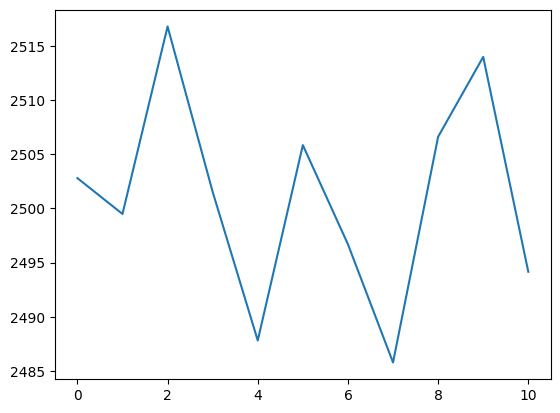

In [31]:
plt.plot(list(meth_historical_train.iloc[60:60+1,cols_wanted].stack()))
plt.plot()

In [32]:
print("Positive turning points:", meth_historical_train.iloc[60:60+1,cols_wanted].apply(lambda row: find_positive_turning_points(row), axis = 1),
      "\nNegative turning points:", meth_historical_train.iloc[60:60+1,cols_wanted].apply(lambda row: find_negative_turning_points(row), axis = 1))

Positive turning points: 20060    3
dtype: int64 
Negative turning points: 20060    3
dtype: int64


In [33]:
x_meth_fe_train = get_features(meth_historical_train, meth_cutoff_train.columns, window_size, sampling_rate)
x_meth_fe_train.info()

Getting features for: ['13', '13_(t-5)', '13_(t-10)', '13_(t-15)', '13_(t-20)', '13_(t-25)', '13_(t-30)', '13_(t-35)', '13_(t-40)', '13_(t-45)', '13_(t-50)']
Calculated mean
Calculated median
Calculated max
Calculated min
Calculated std
Calculated range
Calculated skewness
Calculated kurtosis
Calculated autocorrelation
Calculated number of positive turning points
Calculated number of negative turning points
Getting features for: ['6', '6_(t-5)', '6_(t-10)', '6_(t-15)', '6_(t-20)', '6_(t-25)', '6_(t-30)', '6_(t-35)', '6_(t-40)', '6_(t-45)', '6_(t-50)']
Calculated mean
Calculated median
Calculated max
Calculated min
Calculated std
Calculated range
Calculated skewness
Calculated kurtosis
Calculated autocorrelation
Calculated number of positive turning points
Calculated number of negative turning points
Getting features for: ['14', '14_(t-5)', '14_(t-10)', '14_(t-15)', '14_(t-20)', '14_(t-25)', '14_(t-30)', '14_(t-35)', '14_(t-40)', '14_(t-45)', '14_(t-50)']
Calculated mean
Calculated medi

In [34]:
x_ethy_fe_train = get_features(ethy_historical_train, ethy_cutoff_train.columns, window_size, sampling_rate)
x_meth_fe_test = get_features(meth_historical_test, meth_cutoff_test.columns, window_size, sampling_rate)
x_ethy_fe_test = get_features(ethy_historical_test, ethy_cutoff_test.columns, window_size, sampling_rate)

Getting features for: ['15', '15_(t-5)', '15_(t-10)', '15_(t-15)', '15_(t-20)', '15_(t-25)', '15_(t-30)', '15_(t-35)', '15_(t-40)', '15_(t-45)', '15_(t-50)']
Calculated mean
Calculated median
Calculated max
Calculated min
Calculated std
Calculated range
Calculated skewness
Calculated kurtosis
Calculated autocorrelation
Calculated number of positive turning points
Calculated number of negative turning points
Getting features for: ['16', '16_(t-5)', '16_(t-10)', '16_(t-15)', '16_(t-20)', '16_(t-25)', '16_(t-30)', '16_(t-35)', '16_(t-40)', '16_(t-45)', '16_(t-50)']
Calculated mean
Calculated median
Calculated max
Calculated min
Calculated std
Calculated range
Calculated skewness
Calculated kurtosis
Calculated autocorrelation
Calculated number of positive turning points
Calculated number of negative turning points
Getting features for: ['11', '11_(t-5)', '11_(t-10)', '11_(t-15)', '11_(t-20)', '11_(t-25)', '11_(t-30)', '11_(t-35)', '11_(t-40)', '11_(t-45)', '11_(t-50)']
Calculated mean
Calc

# Save Feature Engineered Datasets
So we don't have to do feature engineering again.

In [81]:
meth_fe_train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1651401 entries, 20000 to 1671400
Data columns (total 89 columns):
 #   Column                      Non-Null Count    Dtype  
---  ------                      --------------    -----  
 0   6                           1651401 non-null  float64
 1   13                          1651401 non-null  float64
 2   14                          1651401 non-null  float64
 3   5                           1651401 non-null  float64
 4   6_(t-5)                     1651401 non-null  float64
 5   13_(t-5)                    1651401 non-null  float64
 6   14_(t-5)                    1651401 non-null  float64
 7   5_(t-5)                     1651401 non-null  float64
 8   6_(t-10)                    1651401 non-null  float64
 9   13_(t-10)                   1651401 non-null  float64
 10  14_(t-10)                   1651401 non-null  float64
 11  5_(t-10)                    1651401 non-null  float64
 12  6_(t-15)                    1651401 non-null  float64
 13

In [35]:
meth_fe_train_df = pd.concat([x_meth_fe_train, y_meth_train], axis = 1)
meth_fe_train_df.to_csv("gas+sensor+array+under+dynamic+gas+mixtures/meth_fe_train.csv")
ethy_fe_train_df = pd.concat([x_ethy_fe_train, y_ethy_train], axis = 1)
ethy_fe_train_df.to_csv("gas+sensor+array+under+dynamic+gas+mixtures/ethy_fe_train.csv")
meth_fe_test_df = pd.concat([x_meth_fe_test, y_meth_test], axis = 1)
meth_fe_test_df.to_csv("gas+sensor+array+under+dynamic+gas+mixtures/meth_fe_test.csv")
ethy_fe_test_df = pd.concat([x_ethy_fe_test, y_ethy_test], axis = 1)
ethy_fe_test_df.to_csv("gas+sensor+array+under+dynamic+gas+mixtures/ethy_fe_test.csv")

# Load the Feature Engineered Datasets

In [23]:
meth_fe_train_df = pd.read_csv('gas+sensor+array+under+dynamic+gas+mixtures/meth_fe_train.csv', index_col = 0)

In [24]:
ethy_fe_train_df = pd.read_csv('gas+sensor+array+under+dynamic+gas+mixtures/ethy_fe_train.csv', index_col = 0)

In [25]:
meth_fe_test_df = pd.read_csv('gas+sensor+array+under+dynamic+gas+mixtures/meth_fe_test.csv', index_col = 0)

In [26]:
ethy_fe_test_df = pd.read_csv('gas+sensor+array+under+dynamic+gas+mixtures/ethy_fe_test.csv', index_col = 0)

# Split the Dataframes into X Sets

In [27]:
x_meth_fe_train = meth_fe_train_df.drop(["Methane"], axis = 1)
x_ethy_fe_train = ethy_fe_train_df.drop(["Ethylene"], axis = 1)
x_meth_fe_test = meth_fe_test_df.drop(["Methane"], axis = 1)
x_ethy_fe_test = ethy_fe_test_df.drop(["Ethylene"], axis = 1)


In [24]:
x_meth_fe_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1651401 entries, 20000 to 1671400
Data columns (total 88 columns):
 #   Column                      Non-Null Count    Dtype  
---  ------                      --------------    -----  
 0   6                           1651401 non-null  float64
 1   13                          1651401 non-null  float64
 2   14                          1651401 non-null  float64
 3   5                           1651401 non-null  float64
 4   6_(t-5)                     1651401 non-null  float64
 5   13_(t-5)                    1651401 non-null  float64
 6   14_(t-5)                    1651401 non-null  float64
 7   5_(t-5)                     1651401 non-null  float64
 8   6_(t-10)                    1651401 non-null  float64
 9   13_(t-10)                   1651401 non-null  float64
 10  14_(t-10)                   1651401 non-null  float64
 11  5_(t-10)                    1651401 non-null  float64
 12  6_(t-15)                    1651401 non-null  float64
 13

# Delete Data frames to save space

In [36]:
del meth_fe_train_df
del ethy_fe_train_df
del meth_fe_test_df
del ethy_fe_test_df

# Redo EDA

# Define Helper Functions

## Define Metrics Function to easily get metrics

In [96]:
def get_main_metrics(actual, predict):
  '''Returns a tuple containing the confusion matrix, classification report, and accuracy'''
  return (confusion_matrix(actual, predict), classification_report(actual, predict, output_dict=True), accuracy_score(actual, predict))

## Define GridSearchCV Helper Functions

In [64]:
model_collections = {}

In [40]:
def optimize_halving_model(model, param_grid, scoring, get_metrics, cv, verbose, n_jobs, x_train, y_train, x_test, y_test):
  """Optimizes a model given a parameter grid and a scaler using HalvingGridSearchCV"""
  try:
    grid = HalvingGridSearchCV(estimator= model,
                      param_grid = param_grid,
                      scoring=scoring,
                      cv=cv, 
                      verbose = verbose,
                      n_jobs=n_jobs)
    # Run fit on the GridSearchCV which will search for the best parameters
    grid_results = grid.fit(x_train, y_train)
    # Run predictions on the test dataset
    best_model_predictions = grid.predict(x_test)
    metrics = None
    if get_metrics:
        metrics = get_main_metrics(y_test, best_model_predictions)
    return (grid_results, y_test, best_model_predictions, metrics, grid_results.best_params_, grid_results.best_score_)
  except Exception as e:
    return ["error",[],str(e)]

# Compare Logistic Regression With ElasticNet Results With No Other Preprocessing

In [134]:
log_enet_param_grid = {
    'penalty': ["elasticnet"],
    'solver': ["saga"],
    'n_jobs': [-1],
    'C': [0.01, 0.1, 1, 10, 100],
    'l1_ratio': [0, 0.25, 0.5, 0.75, 1],
}

In [135]:
no_preprocessing_logenet_meth = optimize_halving_model(LogisticRegression(), log_enet_param_grid, "neg_root_mean_squared_error", True, 2, 10, -1, x1_train, y_meth_train, x1_test, y_meth_test)
print(no_preprocessing_logenet_meth[3][0])
print(no_preprocessing_logenet_meth[3][1])
print(no_preprocessing_logenet_meth[3][2])
print(no_preprocessing_logenet_meth[4])

n_iterations: 3
n_required_iterations: 3
n_possible_iterations: 3
min_resources_: 183489
max_resources_: 1651401
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 25
n_resources: 183489
Fitting 2 folds for each of 25 candidates, totalling 50 fits


----------
iter: 1
n_candidates: 9
n_resources: 550467
Fitting 2 folds for each of 9 candidates, totalling 18 fits
----------
iter: 2
n_candidates: 3
n_resources: 1651401
Fitting 2 folds for each of 3 candidates, totalling 6 fits


c:\Users\jacob\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[[651741  39435]
 [ 49474 512901]]
{'0': {'precision': 0.929445319909015, 'recall': 0.9429450675370673, 'f1-score': 0.9361465278072035, 'support': 691176.0}, '1': {'precision': 0.9286032415051708, 'recall': 0.9120266725939098, 'f1-score': 0.9202403134085876, 'support': 562375.0}, 'accuracy': 0.9290742857689874, 'macro avg': {'precision': 0.929024280707093, 'recall': 0.9274858700654885, 'f1-score': 0.9281934206078956, 'support': 1253551.0}, 'weighted avg': {'precision': 0.9290675420265341, 'recall': 0.9290742857689874, 'f1-score': 0.929010593710847, 'support': 1253551.0}}
0.9290742857689874
{'C': 100, 'l1_ratio': 0.25, 'n_jobs': -1, 'penalty': 'elasticnet', 'solver': 'saga'}


# Run Logistic Regression With Elastic Net At Each Preprocessing Step

In [136]:
all_goods_logenet_meth = optimize_halving_model(LogisticRegression(), log_enet_param_grid, "neg_root_mean_squared_error", True, 2, 10, -1, x1_train[good_sensor_cols], y_meth_train, x1_test[good_sensor_cols], y_meth_test)
print(all_goods_logenet_meth[3][0])
print(all_goods_logenet_meth[3][1])
print(all_goods_logenet_meth[3][2])
print(all_goods_logenet_meth[4])

n_iterations: 3
n_required_iterations: 3
n_possible_iterations: 3
min_resources_: 183489
max_resources_: 1651401
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 25
n_resources: 183489
Fitting 2 folds for each of 25 candidates, totalling 50 fits
----------
iter: 1
n_candidates: 9
n_resources: 550467
Fitting 2 folds for each of 9 candidates, totalling 18 fits
----------
iter: 2
n_candidates: 3
n_resources: 1651401
Fitting 2 folds for each of 3 candidates, totalling 6 fits


c:\Users\jacob\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[[646256  44920]
 [ 37910 524465]]
{'0': {'precision': 0.944589470976342, 'recall': 0.9350093174531523, 'f1-score': 0.9397749796050728, 'support': 691176.0}, '1': {'precision': 0.9211078619914469, 'recall': 0.9325894643254057, 'f1-score': 0.9268131052519969, 'support': 562375.0}, 'accuracy': 0.9339237095259786, 'macro avg': {'precision': 0.9328486664838944, 'recall': 0.933799390889279, 'f1-score': 0.9332940424285349, 'support': 1253551.0}, 'weighted avg': {'precision': 0.9340550213585121, 'recall': 0.9339237095259786, 'f1-score': 0.9339599516649961, 'support': 1253551.0}}
0.9339237095259786
{'C': 0.01, 'l1_ratio': 1, 'n_jobs': -1, 'penalty': 'elasticnet', 'solver': 'saga'}


## F-test / Mutual Info Test

In [137]:
goods_logenet_meth = optimize_halving_model(LogisticRegression(), log_enet_param_grid, "neg_root_mean_squared_error", True, 2, 10, -1, x1_train[good_meth_sensors], y_meth_train, x1_test[good_meth_sensors], y_meth_test)
print(goods_logenet_meth[3][0])
print(goods_logenet_meth[3][1])
print(goods_logenet_meth[3][2])
print(goods_logenet_meth[4])

n_iterations: 3
n_required_iterations: 3
n_possible_iterations: 3
min_resources_: 183489
max_resources_: 1651401
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 25
n_resources: 183489
Fitting 2 folds for each of 25 candidates, totalling 50 fits
----------
iter: 1
n_candidates: 9
n_resources: 550467
Fitting 2 folds for each of 9 candidates, totalling 18 fits
----------
iter: 2
n_candidates: 3
n_resources: 1651401
Fitting 2 folds for each of 3 candidates, totalling 6 fits


c:\Users\jacob\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[[615621  75555]
 [ 38744 523631]]
{'0': {'precision': 0.9407914543106676, 'recall': 0.8906863085523803, 'f1-score': 0.9150534989271972, 'support': 691176.0}, '1': {'precision': 0.8739039296645783, 'recall': 0.9311064681040231, 'f1-score': 0.901598796791559, 'support': 562375.0}, 'accuracy': 0.9088198246421566, 'macro avg': {'precision': 0.9073476919876229, 'recall': 0.9108963883282017, 'f1-score': 0.908326147859378, 'support': 1253551.0}, 'weighted avg': {'precision': 0.9107840021425112, 'recall': 0.9088198246421566, 'f1-score': 0.9090173758547975, 'support': 1253551.0}}
0.9088198246421566
{'C': 0.01, 'l1_ratio': 1, 'n_jobs': -1, 'penalty': 'elasticnet', 'solver': 'saga'}


In [21]:
lr_ethy_goods = optimize_halving_model(LinearRegression(), {}, "neg_root_mean_squared_error", True, 2, 10, -1, x1_train[good_ethy_sensors], y_ethy_train, x1_test[good_ethy_sensors], y_ethy_test)
print(lr_ethy_goods[3:])

n_iterations: 1
n_required_iterations: 1
n_possible_iterations: 1
min_resources_: 1651401
max_resources_: 1651401
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 1
n_resources: 1651401
Fitting 2 folds for each of 1 candidates, totalling 2 fits
3.6288452744986404
20.0 0.0 20.0
((3.6288452744986404, 0.7815977384171372, 0.18144226372493202, 4556141813378902.0, 2.282427266206912), {}, -3.452379363998297)


## Feature Engineering

In [138]:
fe_logenet_meth = optimize_halving_model(LogisticRegression(), log_enet_param_grid, "neg_root_mean_squared_error", True, 2, 10, -1, x_meth_fe_train, y_meth_train, x_meth_fe_test, y_meth_test)
print(fe_logenet_meth[3][0])
print(fe_logenet_meth[3][1])
print(fe_logenet_meth[3][2])
print(fe_logenet_meth[4])

n_iterations: 3
n_required_iterations: 3
n_possible_iterations: 3
min_resources_: 183489
max_resources_: 1651401
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 25
n_resources: 183489
Fitting 2 folds for each of 25 candidates, totalling 50 fits


c:\Users\jacob\AppData\Local\Programs\Python\Python311\Lib\site-packages\joblib\externals\loky\process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


----------
iter: 1
n_candidates: 9
n_resources: 550467
Fitting 2 folds for each of 9 candidates, totalling 18 fits
----------
iter: 2
n_candidates: 3
n_resources: 1651401
Fitting 2 folds for each of 3 candidates, totalling 6 fits


c:\Users\jacob\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
2 fits failed out of a total of 6.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\jacob\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\jacob\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\jacob\AppData\L

[[642144  49032]
 [ 41573 520802]]
{'0': {'precision': 0.9391956028590777, 'recall': 0.9290600368068336, 'f1-score': 0.9341003263526688, 'support': 691176.0}, '1': {'precision': 0.9139538883253719, 'recall': 0.9260760168926429, 'f1-score': 0.9199750222794556, 'support': 562375.0}, 'accuracy': 0.9277213292478727, 'macro avg': {'precision': 0.9265747455922249, 'recall': 0.9275680268497382, 'f1-score': 0.9270376743160622, 'support': 1253551.0}, 'weighted avg': {'precision': 0.9278715249309417, 'recall': 0.9277213292478727, 'f1-score': 0.9277633541208464, 'support': 1253551.0}}
0.9277213292478727
{'C': 100, 'l1_ratio': 0, 'n_jobs': -1, 'penalty': 'elasticnet', 'solver': 'saga'}


# Redo EDA

In [ ]:
# Plot standard plots (all histograms + a time scatter plot)
# num_features = len(train_reduced_df.columns)
# fig = plt.figure(figsize = (12, 5 * num_features//3), layout = "constrained")
# fig.suptitle("EDA Histogram Plots")
# for i in range(1, num_features):
#     ax1 = fig.add_subplot(num_features//3, 3, i)
#     ax1.hist(train_reduced_df.iloc[:,i])
#     x_label_string = train_reduced_df.iloc[:,i].name
#     if i < num_features - 2:
#         x_label_string = "Sensor " + x_label_string + " Average Conductivity (S)"
#     else: 
#         x_label_string = x_label_string + " Concentration (ppm)"
#     ax1.set_xlabel(x_label_string)
#     ax1.set_ylabel("Frequency")
#     if i < num_features - 2:
#         ax1.title.set_text("Sensor " + train_reduced_df.iloc[:,i].name + " Histogram")
#     else:
#         ax1.title.set_text(train_reduced_df.iloc[:,i].name + " Histogram") 
# plt.show()

# Perform Robust Scaler on Data 

In [47]:
# Create scaler
robust_meth_scaler = RobustScaler()
robust_ethy_scaler = RobustScaler()

In [48]:
# First, train all the data on the scalers
robust_meth_scaler.fit(x_meth_fe_train, y_train)
robust_ethy_scaler.fit(x_ethy_fe_train, y_train)

RobustScaler()

In [49]:
# Second, transform all the train data on the fitted scalers
x_meth_train_fe_robust = robust_meth_scaler.transform(x_meth_fe_train)
x_ethy_train_fe_robust = robust_ethy_scaler.transform(x_ethy_fe_train)

In [50]:
# Third, transform all the test data on the fitted scalers
x_meth_test_fe_robust = robust_meth_scaler.transform(x_meth_fe_test)
x_ethy_test_fe_robust = robust_ethy_scaler.transform(x_ethy_fe_test)

# Perform Power Transformer on Data 

In [51]:
# Create transformers
meth_power_transformer = PowerTransformer()
ethy_power_transformer = PowerTransformer()

In [52]:
# First, train all the data on the transformers
meth_power_transformer.fit(x_meth_train_fe_robust, y_train)
ethy_power_transformer.fit(x_ethy_train_fe_robust, y_train)

PowerTransformer()

In [53]:
# Second, transform all the train data on the fitted scalers
x_meth_train_ferp = meth_power_transformer.transform(x_meth_train_fe_robust)
x_ethy_train_ferp = ethy_power_transformer.transform(x_ethy_train_fe_robust)

In [54]:
# Third, transform all the test data on the fitted scalers
x_meth_test_ferp = meth_power_transformer.transform(x_meth_test_fe_robust)
x_ethy_test_ferp = ethy_power_transformer.transform(x_ethy_test_fe_robust)

# Perform Principal Component Analysis (PCA)

In [55]:
pca_meth = PCA()
pca_meth.fit(x_meth_train_ferp)
pca_ethy = PCA()
pca_ethy.fit(x_ethy_train_ferp)

PCA()

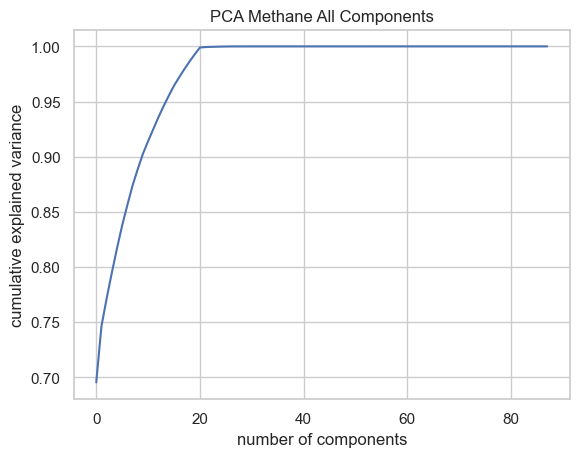

None

In [56]:
# Make plots of cumulative explained variance
sns.set(style='whitegrid')
plt.plot(np.cumsum(pca_meth.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.title("PCA Methane All Components")
# plt.axvline(linewidth=4, color='r', linestyle = '--', x=10, ymin=0, ymax=1)
display(plt.show())

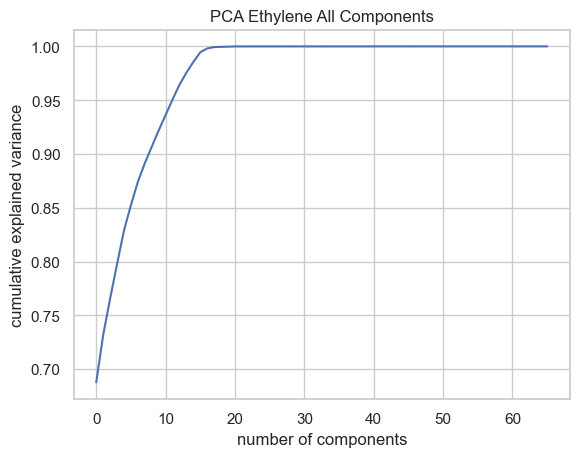

None

In [57]:
sns.set(style='whitegrid')
plt.plot(np.cumsum(pca_ethy.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.title("PCA Ethylene All Components")
# plt.axvline(linewidth=4, color='r', linestyle = '--', x=10, ymin=0, ymax=1)
display(plt.show())

In [101]:
x_meth_train_ferp.shape

(1671401, 31)

In [58]:
# Implement 0.95 variance threshold
pca_meth_best = PCA(n_components=0.95)
pca_meth_best.fit(x_meth_train_ferp)
pca_ethy_best = PCA(n_components=0.95)
pca_ethy_best.fit(x_ethy_train_ferp)

PCA(n_components=0.95)

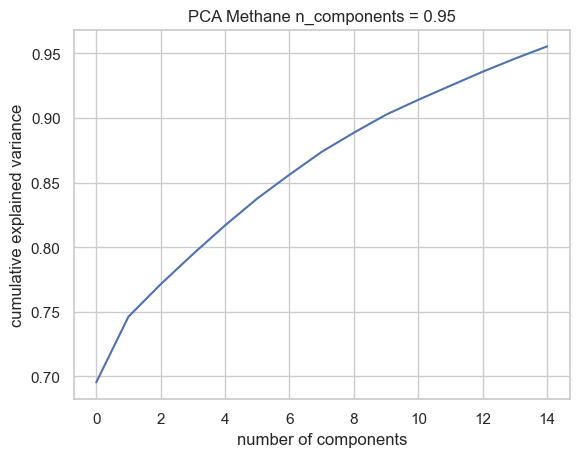

None

In [59]:
# Make plots of cumulative explained variance
sns.set(style='whitegrid')
plt.plot(np.cumsum(pca_meth_best.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.title("PCA Methane n_components = 0.95")
# plt.axvline(linewidth=4, color='r', linestyle = '--', x=10, ymin=0, ymax=1)
display(plt.show())

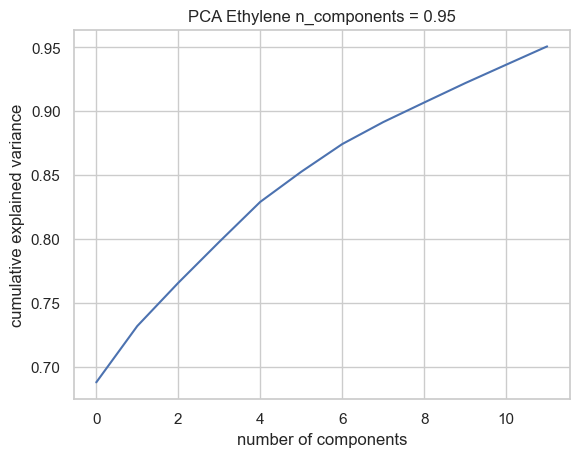

None

In [60]:
# Make plots of cumulative explained variance
sns.set(style='whitegrid')
plt.plot(np.cumsum(pca_ethy_best.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.title("PCA Ethylene n_components = 0.95")
# plt.axvline(linewidth=4, color='r', linestyle = '--', x=10, ymin=0, ymax=1)
display(plt.show())

In [61]:
# Fit the PCA on the data
x_meth_train_preprocessed = pca_meth_best.transform(x_meth_train_ferp)
x_ethy_train_preprocessed = pca_ethy_best.transform(x_ethy_train_ferp)
x_meth_test_preprocessed = pca_meth_best.transform(x_meth_test_ferp)
x_ethy_test_preprocessed = pca_ethy_best.transform(x_ethy_test_ferp)

In [101]:
x_meth_train_preprocessed.shape, y_meth_train.shape

((1651401, 15), (1651401,))

# Run Logistic Regression on other preprocessing Steps

## Robust Scaler

In [133]:
robust_logenet_meth = optimize_halving_model(LogisticRegression(), log_enet_param_grid, "neg_root_mean_squared_error", True, 2, 10, -1, x_meth_train_fe_robust, y_meth_train, x_meth_test_fe_robust, y_meth_test)
print(robust_logenet_meth[3][0])
print(robust_logenet_meth[3][1])
print(robust_logenet_meth[3][2])
print(robust_logenet_meth[4])


n_iterations: 3
n_required_iterations: 3
n_possible_iterations: 3
min_resources_: 183489
max_resources_: 1651401
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 25
n_resources: 183489
Fitting 2 folds for each of 25 candidates, totalling 50 fits
----------
iter: 1
n_candidates: 9
n_resources: 550467
Fitting 2 folds for each of 9 candidates, totalling 18 fits
----------
iter: 2
n_candidates: 3
n_resources: 1651401
Fitting 2 folds for each of 3 candidates, totalling 6 fits


c:\Users\jacob\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[[649957  41219]
 [ 38142 524233]]
{'0': {'precision': 0.9445690227714326, 'recall': 0.9403639593967383, 'f1-score': 0.94246180058364, 'support': 691176.0}, '1': {'precision': 0.9271043342317297, 'recall': 0.9321769282062681, 'f1-score': 0.929633711553279, 'support': 562375.0}, 'accuracy': 0.936691048070641, 'macro avg': {'precision': 0.9358366785015811, 'recall': 0.9362704438015033, 'f1-score': 0.9360477560684595, 'support': 1253551.0}, 'weighted avg': {'precision': 0.9367339173648592, 'recall': 0.936691048070641, 'f1-score': 0.9367067921568196, 'support': 1253551.0}}
0.936691048070641
{'C': 1, 'l1_ratio': 1, 'n_jobs': -1, 'penalty': 'elasticnet', 'solver': 'saga'}


## Power Transformer

In [139]:
power_logenet_meth = optimize_halving_model(LogisticRegression(), log_enet_param_grid, "neg_root_mean_squared_error", True, 2, 10, -1, x_meth_train_ferp, y_meth_train, x_meth_test_ferp, y_meth_test)
print(power_logenet_meth[3][0])
print(power_logenet_meth[3][1])
print(power_logenet_meth[3][2])
print(power_logenet_meth[4])

n_iterations: 3
n_required_iterations: 3
n_possible_iterations: 3
min_resources_: 183489
max_resources_: 1651401
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 25
n_resources: 183489
Fitting 2 folds for each of 25 candidates, totalling 50 fits
----------
iter: 1
n_candidates: 9
n_resources: 550467
Fitting 2 folds for each of 9 candidates, totalling 18 fits


## PCA 

In [ ]:
pca_logenet_meth = optimize_halving_model(LogisticRegression(), log_enet_param_grid, "neg_root_mean_squared_error", True, 2, 10, -1, x_meth_train_fe_robust, y_meth_train, x_meth_test_fe_robust, y_meth_test)
print(pca_logenet_meth[3][0])
print(pca_logenet_meth[3][1])
print(pca_logenet_meth[3][2])
print(pca_logenet_meth[4])

n_iterations: 1
n_required_iterations: 1
n_possible_iterations: 1
min_resources_: 1651401
max_resources_: 1651401
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 1
n_resources: 1651401
Fitting 2 folds for each of 1 candidates, totalling 2 fits
56.347593773902524
296.67 0.0 296.67
((56.347593773902524, 0.8897394154414989, 0.18993357526511787, 7.698961648357403e+16, 34.767754739038146), {}, -56.21649592635262)


# Run Logistic Regression with ElasticNet

In [62]:
log_enet_param_grid = {
    'penalty': ["elasticnet"],
    'solver': ["saga"],
    'n_jobs': [-1],
    'C': [0.01, 0.1, 1, 10, 100],
    'l1_ratio': [0, 0.25, 0.5, 0.75, 1],
}

In [63]:
optim_logenet_meth = optimize_halving_model(LogisticRegression(), log_enet_param_grid, "neg_root_mean_squared_error", True, 5, 10, -1, x_meth_train_preprocessed, y_meth_train, x_meth_test_preprocessed, y_meth_test)
print(optim_logenet_meth[3:])
model_collections["optim_logenet_meth"] = optim_logenet_meth

n_iterations: 3
n_required_iterations: 3
n_possible_iterations: 3
min_resources_: 183489
max_resources_: 1651401
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 25
n_resources: 183489
Fitting 5 folds for each of 25 candidates, totalling 125 fits
----------
iter: 1
n_candidates: 9
n_resources: 550467
Fitting 5 folds for each of 9 candidates, totalling 45 fits
----------
iter: 2
n_candidates: 3
n_resources: 1651401
Fitting 5 folds for each of 3 candidates, totalling 15 fits
((array([[616860,  74316],
       [ 53127, 509248]], dtype=int64), '              precision    recall  f1-score   support\n\n           0       0.92      0.89      0.91    691176\n           1       0.87      0.91      0.89    562375\n\n    accuracy                           0.90   1253551\n   macro avg       0.90      0.90      0.90   1253551\nweighted avg       0.90      0.90      0.90   1253551\n', 0.8983344116035167), {'C': 1, 'l1_ratio': 0.25, 'n_jobs': -1, 'penalty': 'elasticnet', 'solve

NameError: name 'model_collections' is not defined

In [70]:
print(optim_logenet_meth[3][0])
print(optim_logenet_meth[3][1])
print(optim_logenet_meth[3][2])
print(optim_logenet_meth[4])

[[616860  74316]
 [ 53127 509248]]
              precision    recall  f1-score   support

           0       0.92      0.89      0.91    691176
           1       0.87      0.91      0.89    562375

    accuracy                           0.90   1253551
   macro avg       0.90      0.90      0.90   1253551
weighted avg       0.90      0.90      0.90   1253551

0.8983344116035167
{'C': 1, 'l1_ratio': 0.25, 'n_jobs': -1, 'penalty': 'elasticnet', 'solver': 'saga'}


In [66]:
joblib.dump(optim_logenet_meth, "models/best_meth_fmi_logenet.pkl")

['models/best_meth_fmi_logenet.pkl']

In [67]:
optim_logenet_ethy = optimize_halving_model(LogisticRegression(), log_enet_param_grid, "neg_root_mean_squared_error", True, 5, 10, -1, x_ethy_train_preprocessed, y_ethy_train, x_ethy_test_preprocessed, y_ethy_test)
print(optim_logenet_ethy[3:])
model_collections["optim_logenet_ethy"] = optim_logenet_ethy

n_iterations: 3
n_required_iterations: 3
n_possible_iterations: 3
min_resources_: 183489
max_resources_: 1651401
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 25
n_resources: 183489
Fitting 5 folds for each of 25 candidates, totalling 125 fits
----------
iter: 1
n_candidates: 9
n_resources: 550467
Fitting 5 folds for each of 9 candidates, totalling 45 fits
----------
iter: 2
n_candidates: 3
n_resources: 1651401
Fitting 5 folds for each of 3 candidates, totalling 15 fits
((array([[553713, 120842],
       [102561, 476435]], dtype=int64), '              precision    recall  f1-score   support\n\n           0       0.84      0.82      0.83    674555\n           1       0.80      0.82      0.81    578996\n\n    accuracy                           0.82   1253551\n   macro avg       0.82      0.82      0.82   1253551\nweighted avg       0.82      0.82      0.82   1253551\n', 0.8217838763640251), {'C': 0.01, 'l1_ratio': 0.5, 'n_jobs': -1, 'penalty': 'elasticnet', 'sol

In [69]:
print(optim_logenet_ethy[3][0])
print(optim_logenet_ethy[3][1])
print(optim_logenet_ethy[3][2])
print(optim_logenet_ethy[4])

[[553713 120842]
 [102561 476435]]
              precision    recall  f1-score   support

           0       0.84      0.82      0.83    674555
           1       0.80      0.82      0.81    578996

    accuracy                           0.82   1253551
   macro avg       0.82      0.82      0.82   1253551
weighted avg       0.82      0.82      0.82   1253551

0.8217838763640251
{'C': 0.01, 'l1_ratio': 0.5, 'n_jobs': -1, 'penalty': 'elasticnet', 'solver': 'saga'}


In [198]:
joblib.dump(optim_logenet_ethy, "models/best_ethy_fmi_logenet.pkl")

['models/best_ethy_fmi_enet.pkl']

# Run Linear SVC

In [71]:
linear_svc_param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'intercept_scaling': [0.1, 1, 10, 100],
    'verbose': [10],
}

In [72]:
optim_lsvc_meth = optimize_halving_model(LinearSVC(), linear_svc_param_grid, "neg_root_mean_squared_error", True, 5, 10, -1, x_meth_train_preprocessed, y_meth_train, x_meth_test_preprocessed, y_meth_test)
print(optim_lsvc_meth[3:])
model_collections["optim_lsvc_meth"] = optim_lsvc_meth

n_iterations: 3
n_required_iterations: 3
n_possible_iterations: 3
min_resources_: 183489
max_resources_: 1651401
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 20
n_resources: 183489
Fitting 5 folds for each of 20 candidates, totalling 100 fits
----------
iter: 1
n_candidates: 7
n_resources: 550467
Fitting 5 folds for each of 7 candidates, totalling 35 fits
----------
iter: 2
n_candidates: 3
n_resources: 1651401
Fitting 5 folds for each of 3 candidates, totalling 15 fits


c:\Users\jacob\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[LibLinear]((array([[615096,  76080],
       [ 53292, 509083]], dtype=int64), '              precision    recall  f1-score   support\n\n           0       0.92      0.89      0.90    691176\n           1       0.87      0.91      0.89    562375\n\n    accuracy                           0.90   1253551\n   macro avg       0.90      0.90      0.90   1253551\nweighted avg       0.90      0.90      0.90   1253551\n', 0.8967955831075082), {'C': 0.01, 'intercept_scaling': 0.1, 'verbose': 10}, -0.29164032892388353)


In [73]:
print(optim_lsvc_meth[3][0])
print(optim_lsvc_meth[3][1])
print(optim_lsvc_meth[3][2])
print(optim_lsvc_meth[4])

[[615096  76080]
 [ 53292 509083]]
              precision    recall  f1-score   support

           0       0.92      0.89      0.90    691176
           1       0.87      0.91      0.89    562375

    accuracy                           0.90   1253551
   macro avg       0.90      0.90      0.90   1253551
weighted avg       0.90      0.90      0.90   1253551

0.8967955831075082
{'C': 0.01, 'intercept_scaling': 0.1, 'verbose': 10}


In [74]:
joblib.dump(optim_lsvc_meth, "models/best_meth_fmi_lsvc.pkl")

['models/best_meth_fmi_lsvc.pkl']

In [75]:
optim_lsvc_ethy = optimize_halving_model(LinearSVC(), linear_svc_param_grid, "neg_root_mean_squared_error", True, 5, 10, -1, x_ethy_train_preprocessed, y_ethy_train, x_ethy_test_preprocessed, y_ethy_test)
print(optim_lsvc_ethy[3:])
model_collections["optim_lsvc_ethy"] = optim_lsvc_ethy

n_iterations: 3
n_required_iterations: 3
n_possible_iterations: 3
min_resources_: 183489
max_resources_: 1651401
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 20
n_resources: 183489
Fitting 5 folds for each of 20 candidates, totalling 100 fits


----------
iter: 1
n_candidates: 7
n_resources: 550467
Fitting 5 folds for each of 7 candidates, totalling 35 fits
----------
iter: 2
n_candidates: 3
n_resources: 1651401
Fitting 5 folds for each of 3 candidates, totalling 15 fits


c:\Users\jacob\AppData\Local\Programs\Python\Python311\Lib\site-packages\joblib\externals\loky\process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
c:\Users\jacob\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[LibLinear]((array([[546039, 128516],
       [ 95982, 483014]], dtype=int64), '              precision    recall  f1-score   support\n\n           0       0.85      0.81      0.83    674555\n           1       0.79      0.83      0.81    578996\n\n    accuracy                           0.82   1253551\n   macro avg       0.82      0.82      0.82   1253551\nweighted avg       0.82      0.82      0.82   1253551\n', 0.8209103578554043), {'C': 0.01, 'intercept_scaling': 10, 'verbose': 10}, -0.41491112471027086)


In [76]:
print(optim_lsvc_ethy[3][0])
print(optim_lsvc_ethy[3][1])
print(optim_lsvc_ethy[3][2])
print(optim_lsvc_ethy[4])

[[546039 128516]
 [ 95982 483014]]
              precision    recall  f1-score   support

           0       0.85      0.81      0.83    674555
           1       0.79      0.83      0.81    578996

    accuracy                           0.82   1253551
   macro avg       0.82      0.82      0.82   1253551
weighted avg       0.82      0.82      0.82   1253551

0.8209103578554043
{'C': 0.01, 'intercept_scaling': 10, 'verbose': 10}


In [77]:
joblib.dump(optim_lsvc_ethy, "models/best_ethy_fmi_lsvc.pkl")

['models/best_ethy_fmi_lsvc.pkl']

# Plot Results

In [108]:
print(model_collections['optim_lsvc_ethy'][3][1]['accuracy'])
print(model_collections['optim_lsvc_ethy'][3][1]['weighted avg'])

0.8209103578554043
{'precision': 0.8224845676024402, 'recall': 0.8209103578554043, 'f1-score': 0.8211446382608074, 'support': 1253551.0}


In [98]:
for model in model_collections.keys():
    curr_model = model_collections[model]
    model_results = get_main_metrics(curr_model[1], curr_model[2])
    model_collections[model] = (curr_model[0], curr_model[1], curr_model[2], model_results, curr_model[4], curr_model[5])
    print(type(model_results[1]))

<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>


C:\Users\jacob\AppData\Local\Temp\ipykernel_28380\2431946846.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(best_model_labels, rotation = 45)
C:\Users\jacob\AppData\Local\Temp\ipykernel_28380\2431946846.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(best_model_labels, rotation = 45)
C:\Users\jacob\AppData\Local\Temp\ipykernel_28380\2431946846.py:27: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(best_model_labels, rotation = 45)
C:\Users\jacob\AppData\Local\Temp\ipykernel_28380\2431946846.py:35: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(best_model_labels, rotation = 45)


Text(0.5, 1.0, 'F1 Scores of Hypertuned Models')

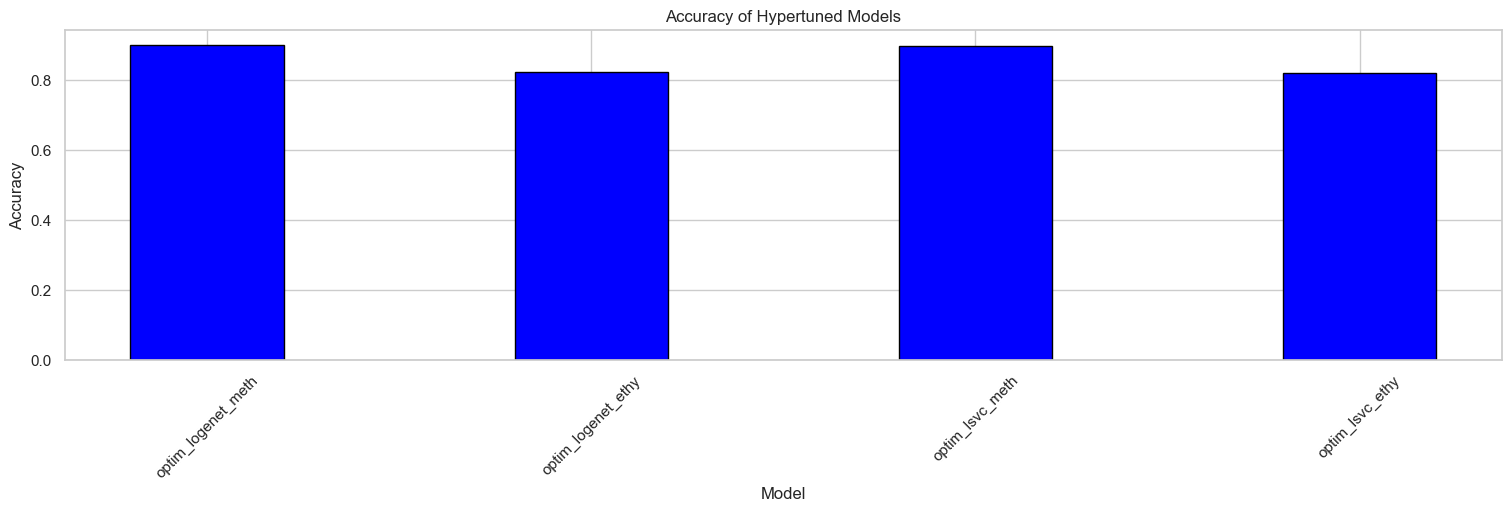

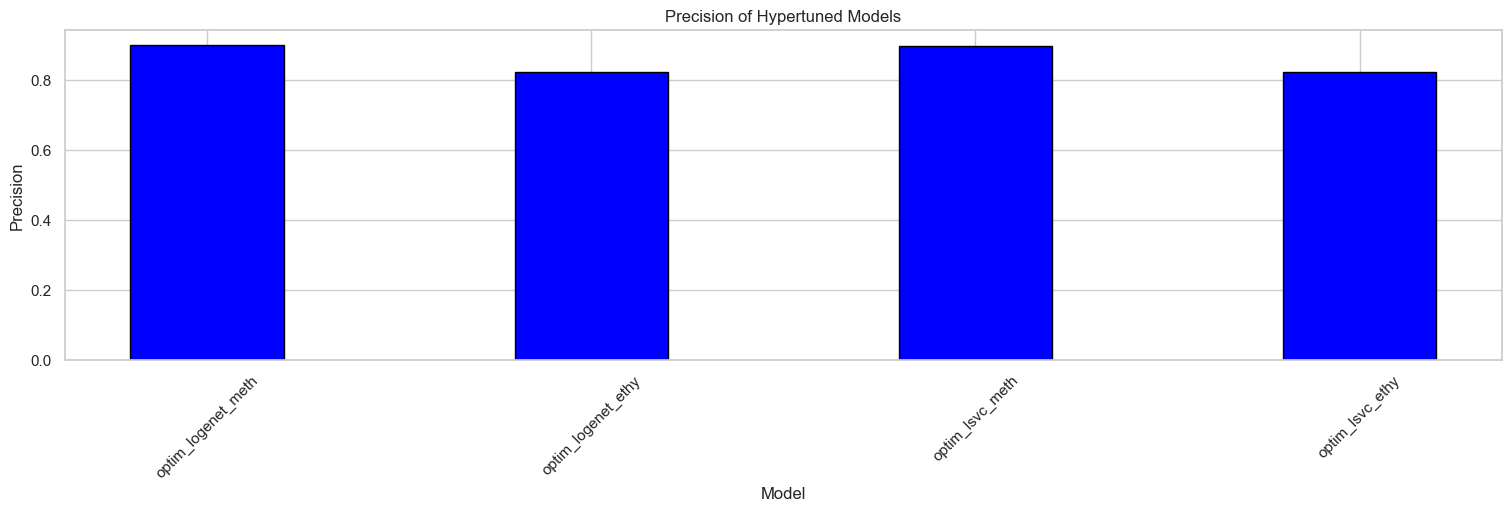

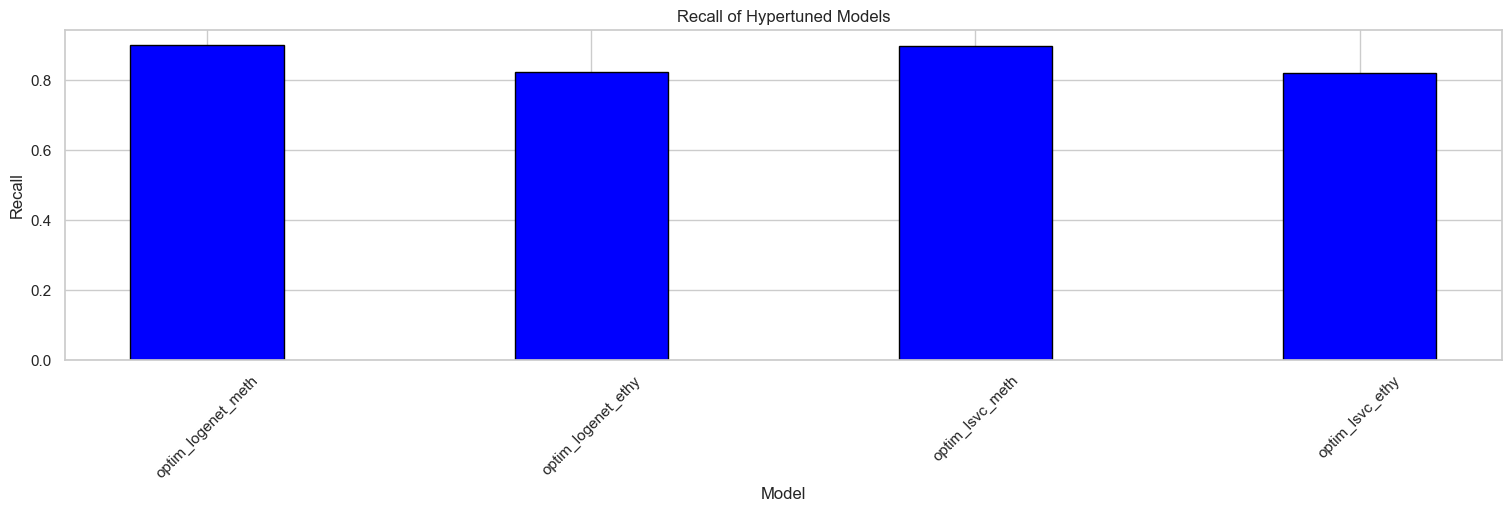

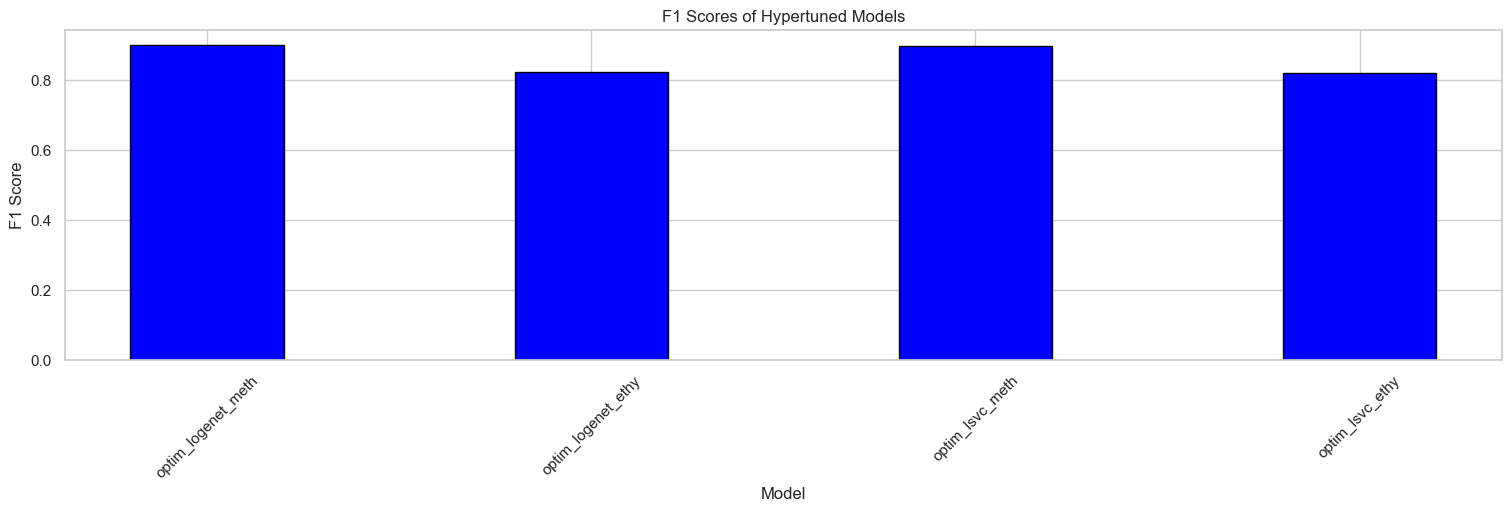

In [110]:
# Get Plots of the model data
best_model_labels = model_collections.keys()
accuracies = [model_collections[label][3][2] for label in best_model_labels]
precisions = [model_collections[label][3][1]['weighted avg']['precision'] for label in best_model_labels]
recalls = [model_collections[label][3][1]['weighted avg']['recall'] for label in best_model_labels]
f1_scores = [model_collections[label][3][1]['weighted avg']['f1-score']  for label in best_model_labels]

fig = plt.figure(figsize = (15, 5), layout = "constrained")
ax1 = fig.add_subplot(1, 1, 1)
ax1.bar(best_model_labels, accuracies, color = 'blue', edgecolor='black', width = 0.4)
ax1.set_xticklabels(best_model_labels, rotation = 45)
ax1.set_ylabel("Accuracy")
ax1.set_xlabel("Model")
ax1.set_title("Accuracy of Hypertuned Models")

fig = plt.figure(figsize = (15, 5), layout = "constrained")
ax1 = fig.add_subplot(1, 1, 1)
ax1.bar(best_model_labels, precisions, color = 'blue', edgecolor='black', width = 0.4)
ax1.set_xticklabels(best_model_labels, rotation = 45)
ax1.set_ylabel("Precision")
ax1.set_xlabel("Model")
ax1.set_title("Precision of Hypertuned Models")

fig = plt.figure(figsize = (15, 5), layout = "constrained")
ax1 = fig.add_subplot(1, 1, 1)
ax1.bar(best_model_labels, recalls, color = 'blue', edgecolor='black', width = 0.4)
ax1.set_xticklabels(best_model_labels, rotation = 45)
ax1.set_ylabel("Recall")
ax1.set_xlabel("Model")
ax1.set_title("Recall of Hypertuned Models")

fig = plt.figure(figsize = (15, 5), layout = "constrained")
ax1 = fig.add_subplot(1, 1, 1)
ax1.bar(best_model_labels, f1_scores, color = 'blue', edgecolor='black', width = 0.4)
ax1.set_xticklabels(best_model_labels, rotation = 45)
ax1.set_ylabel("F1 Score")
ax1.set_xlabel("Model")
ax1.set_title("F1 Scores of Hypertuned Models")

In [117]:
len(np.where(model_collections['optim_logenet_ethy'][1] == 0)[0])

674555

C:\Users\jacob\AppData\Local\Temp\ipykernel_28380\2311624803.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(['Actual 0', 'Predicted 0', 'Actual 1', 'Predicted 1'], rotation = 45)


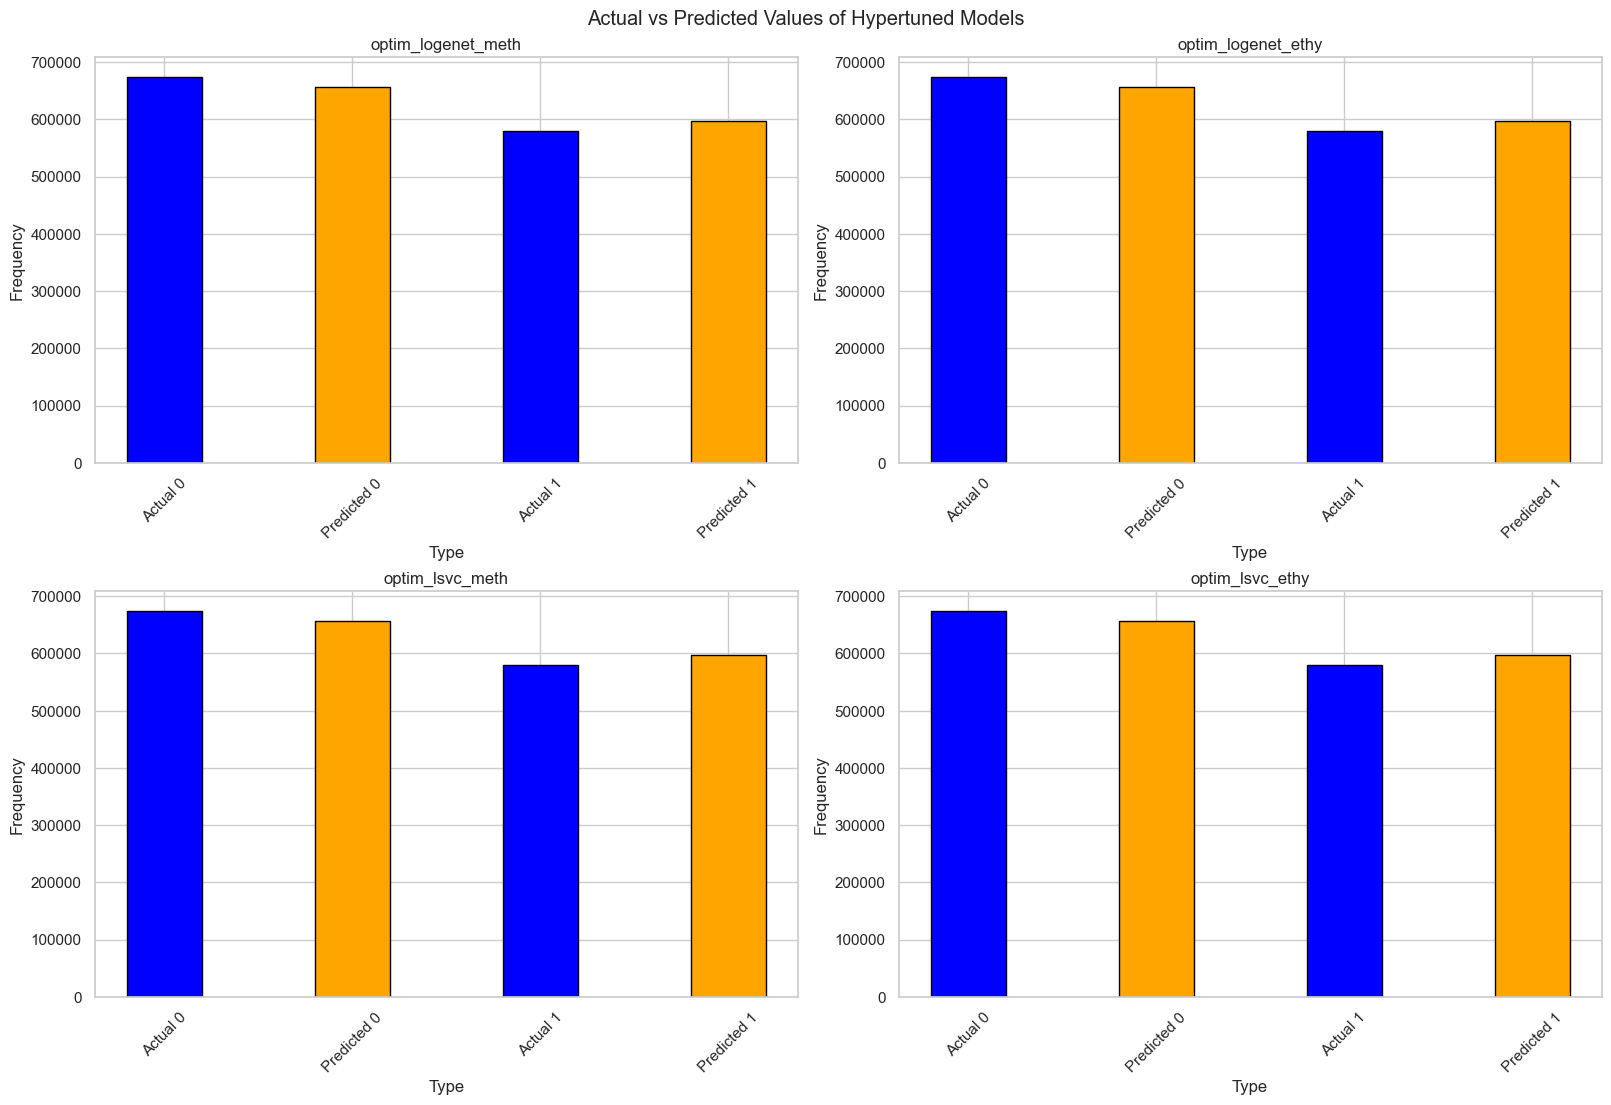

In [119]:
# Make plots of actual vs predicted values
fig = plt.figure(figsize=(16, 15), layout = "constrained")
fig.suptitle("Actual vs Predicted Values of Hypertuned Models")
for i in range(len(model_collections)):
  curr_best_model_label = list(best_model_labels)[i]
  curr_best_model = model_collections[curr_best_model_label]

  ax1 = fig.add_subplot(len(model_collections)//2 + 1, 2, i + 1)
  ax1.set_ylabel("Frequency")
  ax1.set_xlabel("Type")
  ax1.title.set_text(curr_best_model_label)
  # Calculate the frequencies
  frequencies = [len(np.where(model_collections['optim_logenet_ethy'][1] == 0)[0]), 
                 len(np.where(model_collections['optim_logenet_ethy'][2] == 0)[0]), 
                 len(np.where(model_collections['optim_logenet_ethy'][1] == 1)[0]),
                 len(np.where(model_collections['optim_logenet_ethy'][2] == 1)[0])]
  # Plot bar plots of the actual and predicted values
  ax1.bar(['Actual 0', 'Predicted 0', 'Actual 1', 'Predicted 1'], frequencies, color = ['blue', 'orange', 'blue', 'orange'], edgecolor='black', width = 0.4)
  ax1.set_xticklabels(['Actual 0', 'Predicted 0', 'Actual 1', 'Predicted 1'], rotation = 45)
  # Make sure that the axes are the same
  # ax1.set_aspect('equal', adjustable='box')
plt.show()

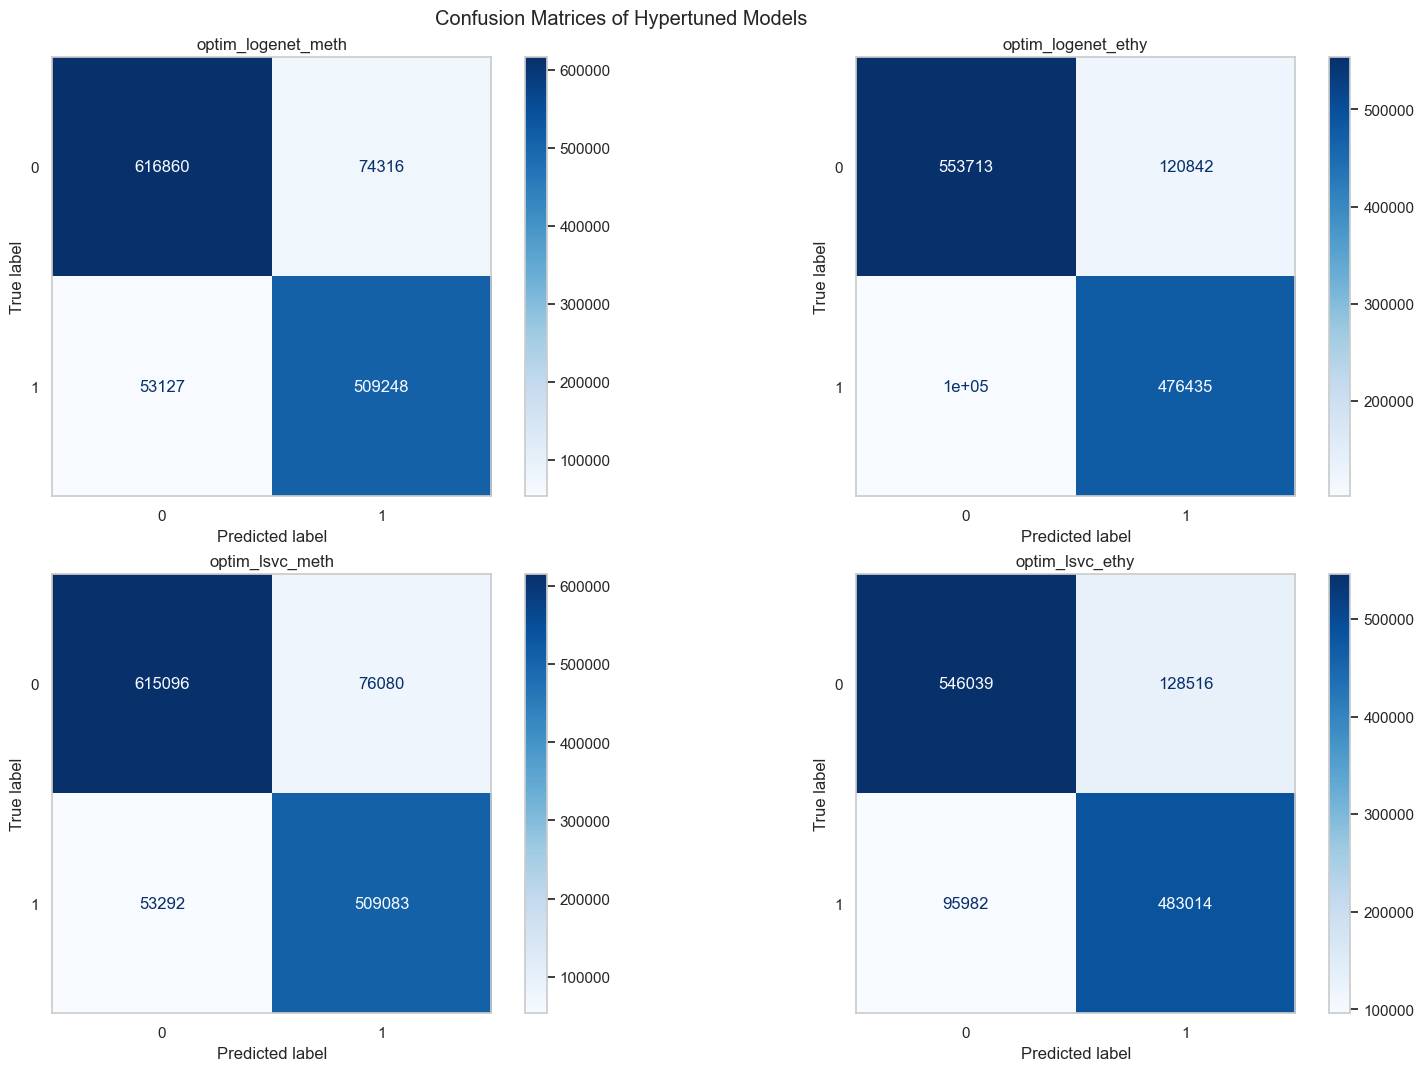

In [128]:
# Make plots of confusion matrices
fig = plt.figure(figsize=(16, 15), layout = "constrained")

fig.suptitle("Confusion Matrices of Hypertuned Models")
for i in range(len(model_collections)):
  curr_best_model_label = list(best_model_labels)[i]
  curr_best_model = model_collections[curr_best_model_label]

  ax1 = fig.add_subplot(len(model_collections)//2 + 1, 2, i + 1)
  ax1.title.set_text(curr_best_model_label)
  ax1.grid(False)
  # Plot the confusion matrix
  ConfusionMatrixDisplay.from_predictions(curr_best_model[1], curr_best_model[2], ax = ax1, cmap=plt.cm.Blues)
plt.show()

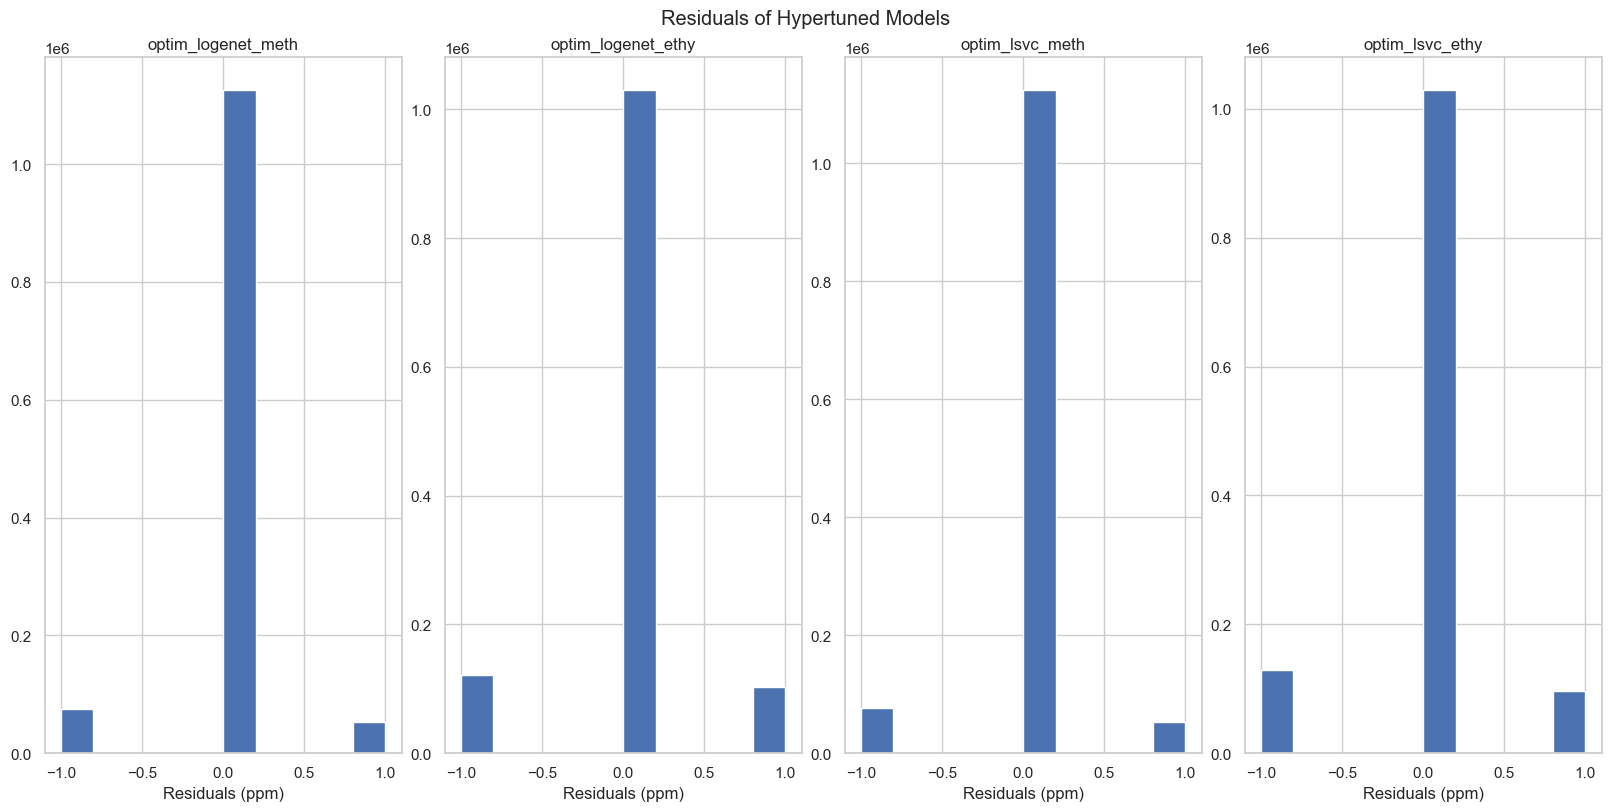

In [112]:
# Make plots of residuals values
fig = plt.figure(figsize=(16, 15), layout = "constrained")
fig.suptitle("Residuals of Hypertuned Models")
for i in range(len(model_collections)):
  curr_best_model_label = list(best_model_labels)[i]
  curr_best_model = model_collections[curr_best_model_label]
  ax1 = fig.add_subplot(len(model_collections)//4 + 1, 4, i + 1)
  ax1.set_xlabel("Residuals (ppm)")
  ax1.title.set_text(curr_best_model_label)
  # Plot the predicted y values vs the actual y values
  # print(residuals[i].shape, residuals[i])
  ax1.hist(curr_best_model[1] - curr_best_model[2])
  # Make sure that the axes are the same
  # ax1.set_aspect('equal', adjustable='box')
plt.show()

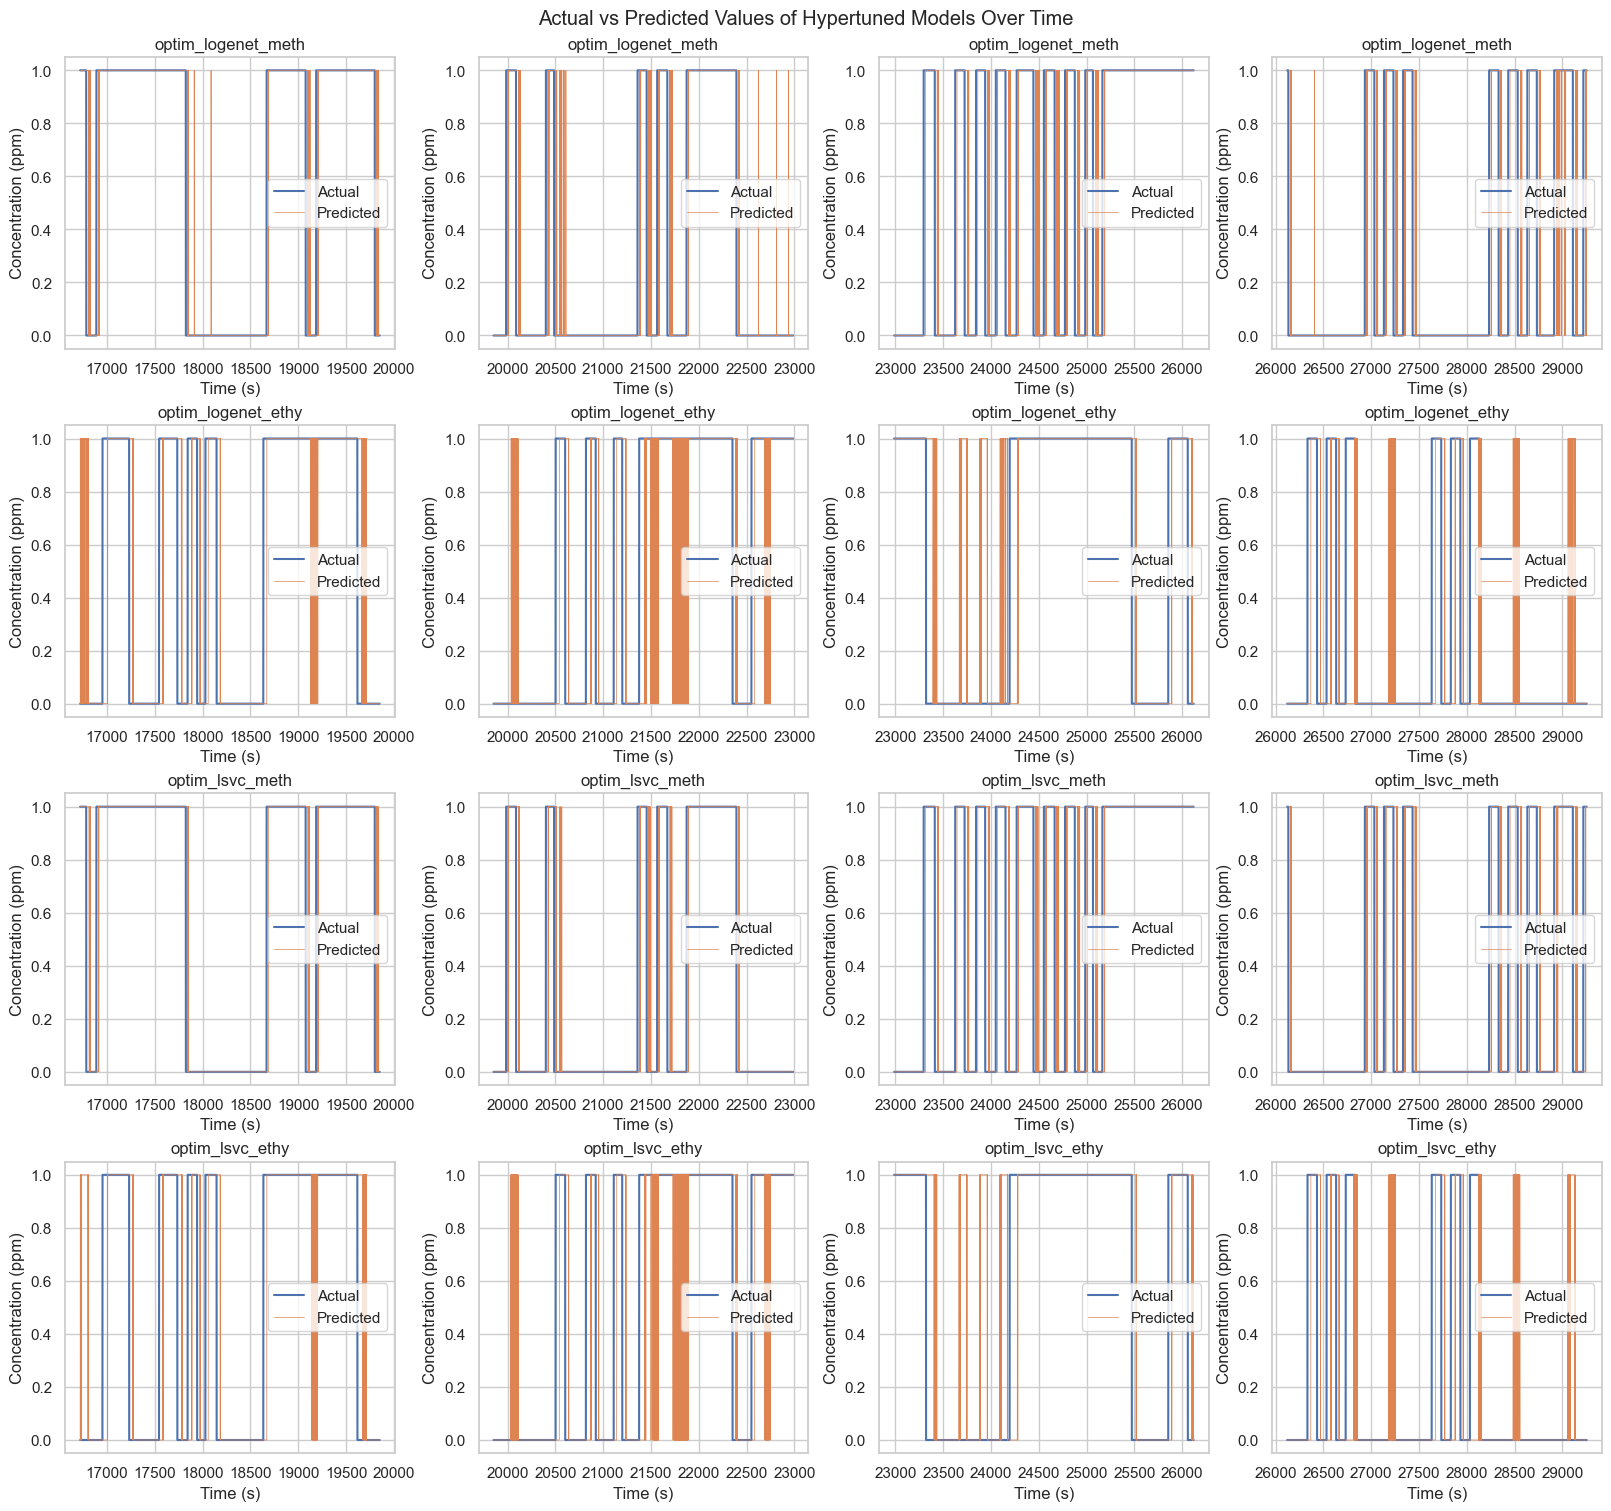

In [113]:
# Make plots of actual vs predicted values over time
fig = plt.figure(figsize=(16, 15), layout = "constrained")
fig.suptitle("Actual vs Predicted Values of Hypertuned Models Over Time")
num_ranges = 4
for i in range(len(model_collections)):
  curr_best_model_label = list(best_model_labels)[i]
  curr_best_model = model_collections[curr_best_model_label]


  for j in range(num_ranges):
    # Plot the ith range
    # Plot the predicted y values vs the actual y values
    ax1 = fig.add_subplot(len(model_collections), num_ranges, i * num_ranges + j + 1)
    ax1.set_ylabel("Concentration (ppm)")
    ax1.set_xlabel("Time (s)")
    ax1.title.set_text(curr_best_model_label)
    data_len = len(x1_test['Time'])
    ax1.plot(x1_test['Time'][j * data_len // 4: (j + 1) * data_len // 4], curr_best_model[1][j * data_len // 4: (j + 1) * data_len // 4], label = "Actual")
    ax1.plot(x1_test['Time'][j * data_len // 4: (j + 1) * data_len // 4], curr_best_model[2][j * data_len // 4: (j + 1) * data_len // 4], label = "Predicted", linewidth = 0.5)
    ax1.legend()
  # Plot the line y = x
  # Make sure that the axes are the same
  # ax1.set_aspect('equal', adjustable='box')
plt.show()